# Proyecto 1- Parte final (Core)
Proyecto 1: Análisis y Predicción de Ventas en una Tienda de Retail

## Objetivo:
Realizar un **análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para *predecir ventas* en una tienda de retail**.
Además,** generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados**. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.



## Dataset

https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

# Parte 1: Exploración y Visualización de Datos (EDA)



## 1) Carga y Exploración Inicial de Datos:


### Cargar el dataset y revisar su estructura básica.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/5_Core_retail_sales_dataset.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Describir las variables y su distribución.

In [11]:
# Función para visualizar distribución de las variables
def vis_hist_boxplot(df):
    for i in df.columns:
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
        sns.set(style="white", palette="muted", color_codes=True)
        sns.despine(left=True)

        # Histograma con kde
        sns.histplot(data=df, x=i, kde=True, ax=ax[0]).set_xlabel(f"{i}")
        ax[0].set_ylabel('Frecuencia')
        # Boxplot
        sns.boxplot(data=df, x=i, ax=ax[1])

        plt.tight_layout()
        plt.show()

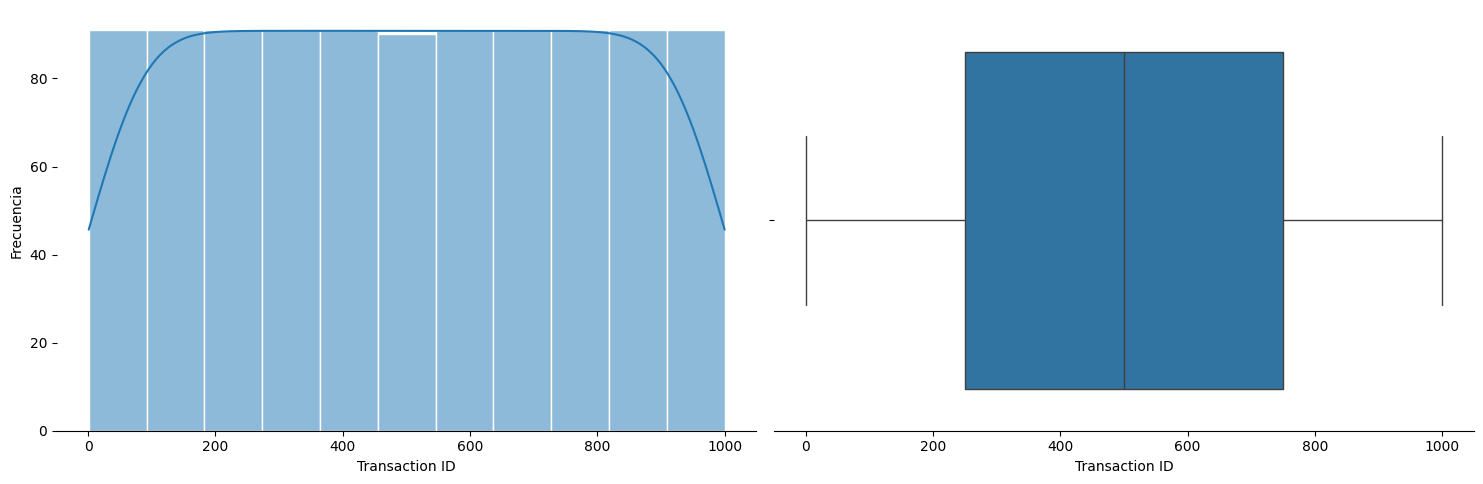

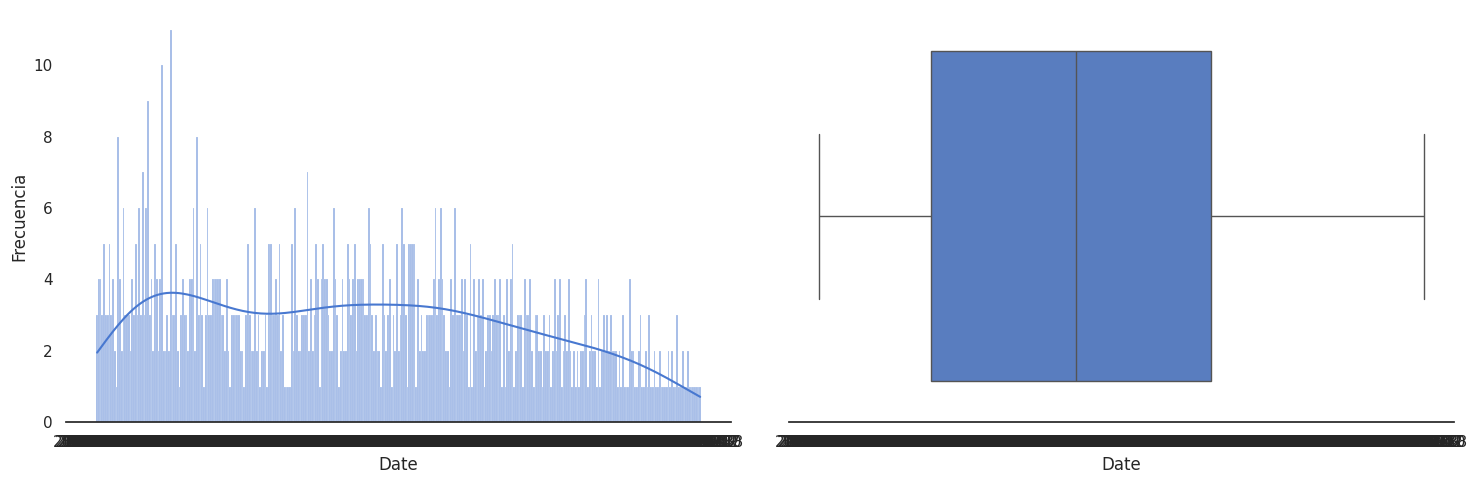

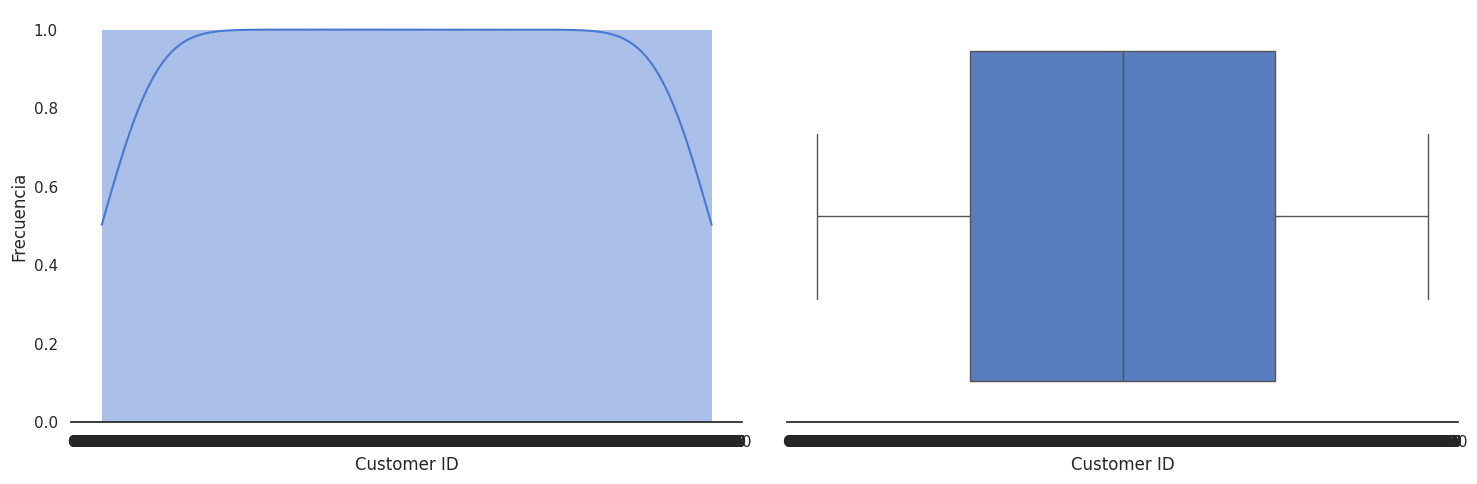

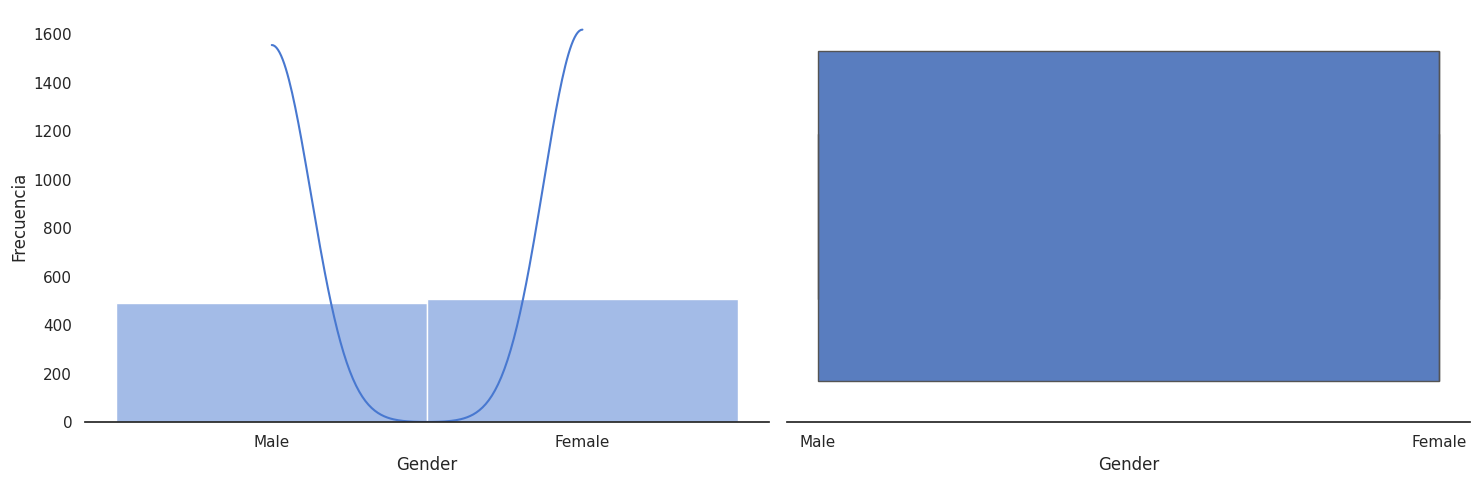

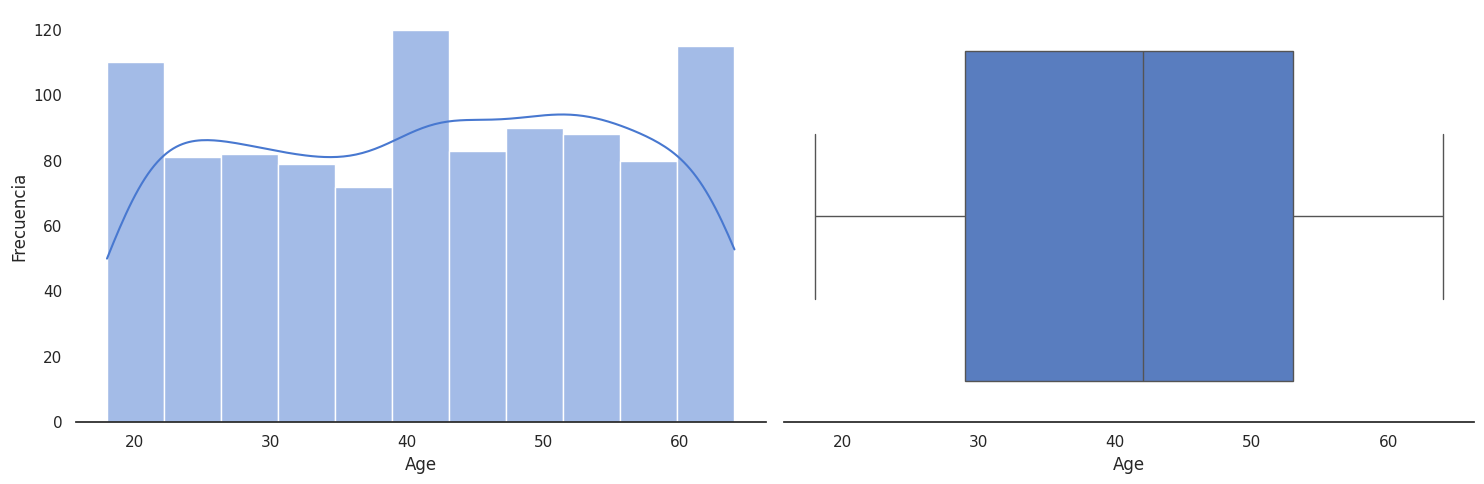

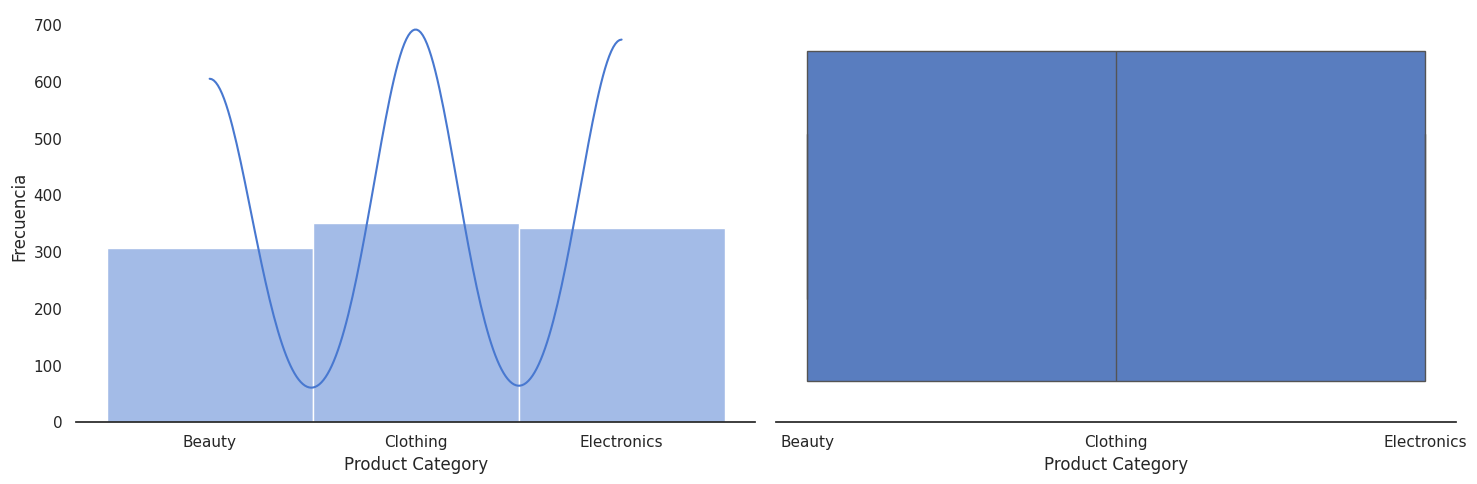

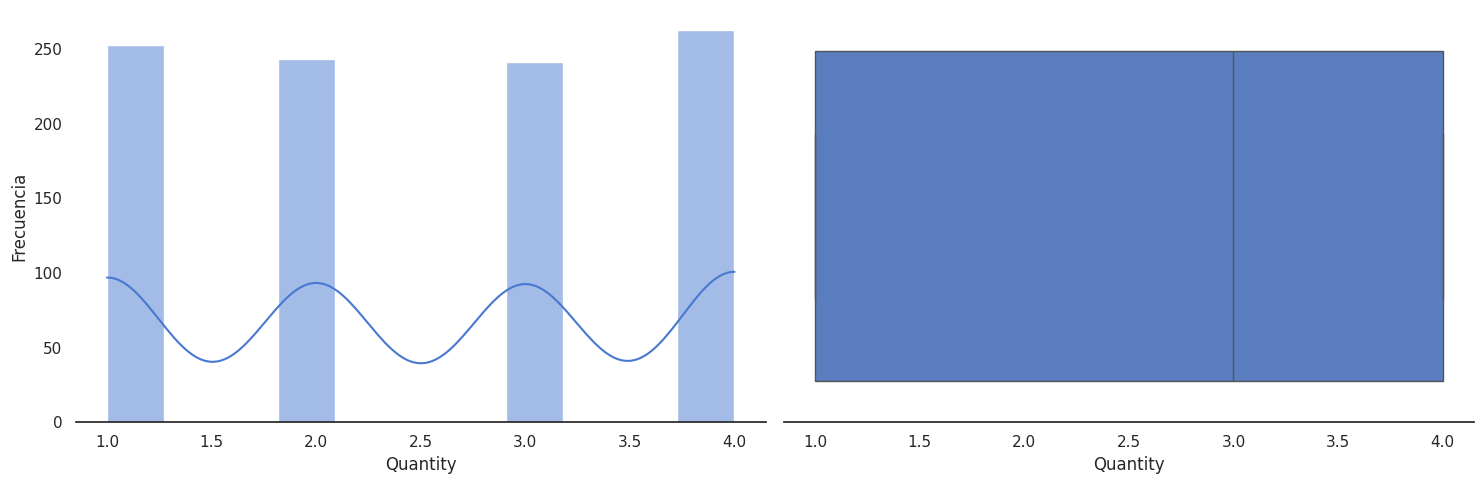

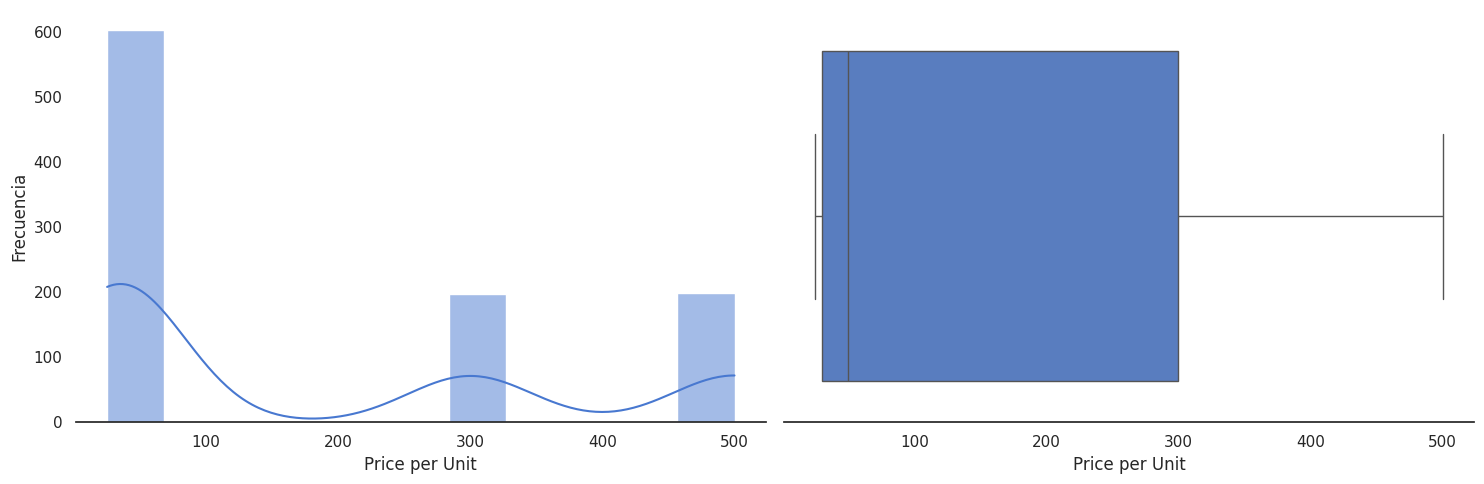

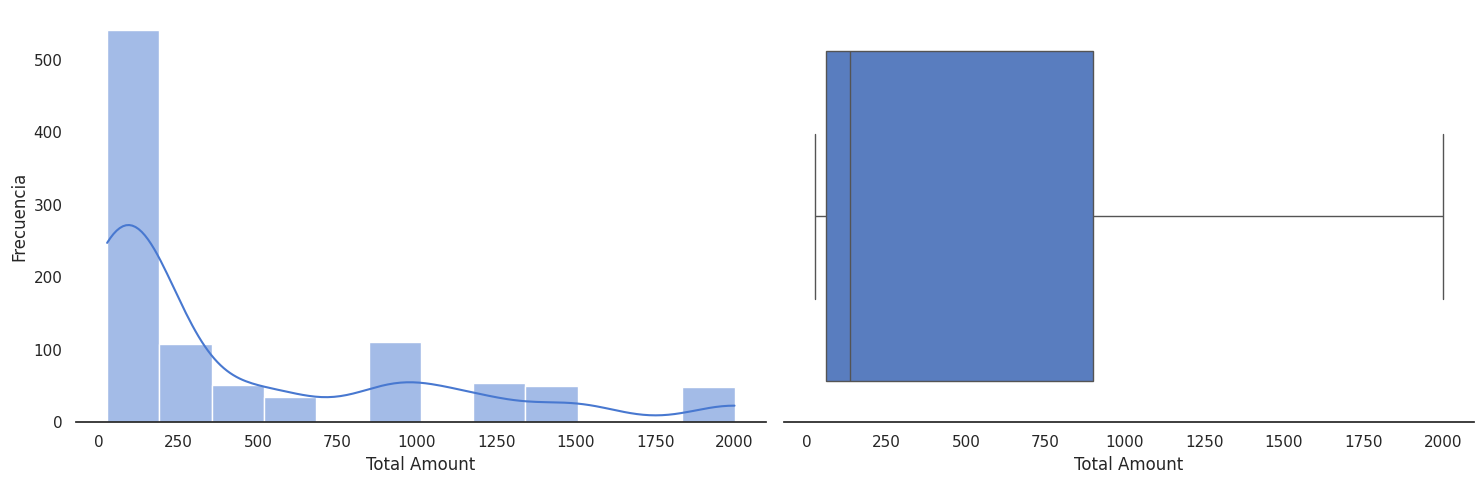

In [12]:
vis_hist_boxplot(df)

In [13]:
df.duplicated().sum()

0

### Identificar y tratar valores nulos y outliers.

In [14]:
df.isna().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [15]:
# Detectar outliers en variables numéricas (no está incluida selección de columnas numéricas)
def outliers_IQR(df):
    for col in df:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1               # Interquartile range

        # Definir los límites inferior y superior de los valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n🚩 Outliers detected in {col}: {outliers.shape[0]}")

        # Opcional: Remover outliers
        # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# ***IQR (Rango Intercuartílico)*** medida de dispersión estadística que ayuda a ID valores atípicos (outliers)

In [16]:
outliers_IQR(df.select_dtypes(include=['int', 'float']))


🚩 Outliers detected in Transaction ID: 0

🚩 Outliers detected in Age: 0

🚩 Outliers detected in Quantity: 0

🚩 Outliers detected in Price per Unit: 0

🚩 Outliers detected in Total Amount: 0


#### Análisis:
-	Se cargaron los datos y se revisó que estuvieran correctamente cargados
-	No hay presencia de valores nulos, y de 9 columnas, 5 son de tipo numérico y 4 son de tipo objeto
-	En los boxplot no parecen haber outliers, además las dos columnas de ID no parecen mostrar algún tipo de información, hay varios registros dados en una misma fecha, hay más presencia de mujeres que de hombres en el dataset, el rango de edad es amplio y no tiene una distribución normal, hay 3 categorías de producto donde la de mayor frecuencia es ropa, seguido de electrónicos y por último belleza, cantidad, precio por unidad y ventas totales no tienen distribución normal, pero esta última tiene un sesgo hacía la derecha bastante marcado, y la frecuencia de la variable ventas totales se concentra cerca o por debajo de los 250 (unidades de algún tipo, dólar supondríamos)
-	No hay duplicados y se confirma que no hay nulos y tampoco outliers en las variables numéricas


## 2) Análisis de Correlación:


### Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.


In [17]:
# Revisar correlaciones numéricas en heatmap para variables numéricas con diferentes métodos
def correlaciones(df, methods=['pearson', 'kendall', 'spearman']):

    # Seleccionar solo columnas numéricas
    num_df = df.select_dtypes(include=np.number)

    for method in methods:
        correlation_matrix = num_df.corr(method=method)
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Correlation Heatmap ({method.capitalize()} Method)')
        plt.show()

# ***Pearson*** Mide relación lineal entre 2 variables, mejor para relaciones lineales,
# asume distribución normal, sensible a valores atípicos (outliers), varía entre -1 y +1,

# ***Kendall (Tau)*** correlación por rangos (basada en el orden de los datos),
# no asume ninguna distribución específica, + robusta contra outliers que Pearson,
# buena para muestras pequeñas, mejor para datos ordinales o cuando hay muchos empates

# ***Spearman (Rho)***: correlación por rangos, no asume distribución normal, buena para datos ordinales,
# + robusta contra outliers que Pearson, puede detectar relaciones monótonas no lineales,

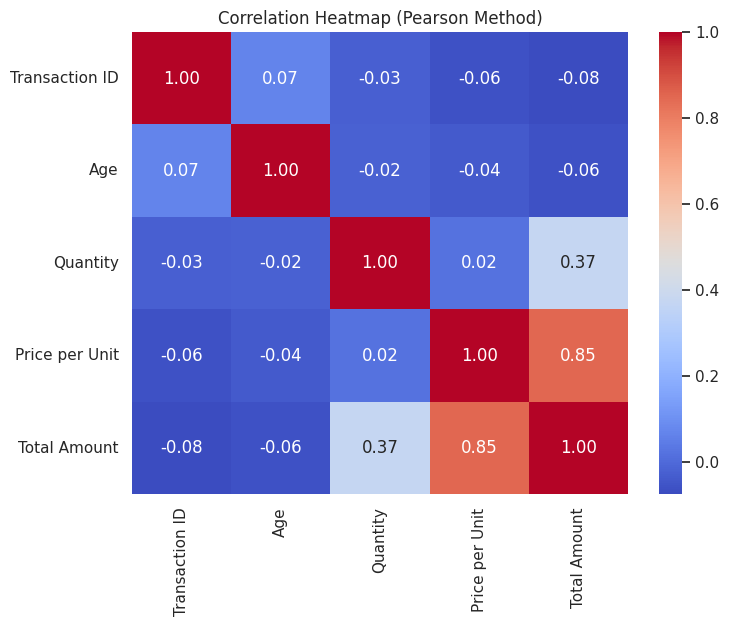

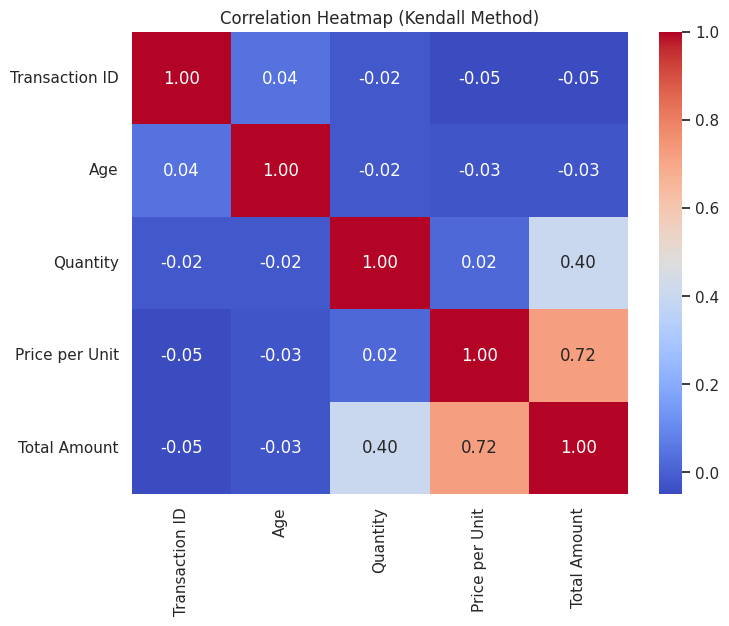

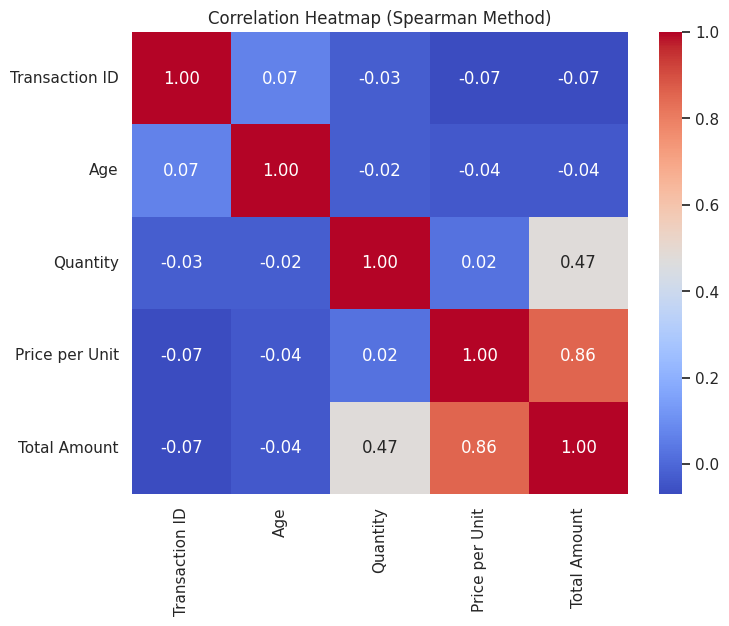

In [18]:
correlaciones(df)

#### Análisis:
-	Se realizan las visualizaciones para los tres métodos de correlación con las columnas numéricas con el fin de observar diferencias y según las condiciones o supuestos estadísticos, tener claro cual es el método más optimo dado el objetivo, en este caso, la variable objetivo es “Total Amount”,
-	Como Total Amount no tiene una distribución normal, y considero que 1.000 entradas son una buena cantidad de muestras, decido analizar por Spearman, donde las variables con alguna correlación significativa con el objetivo, son Price per Unit y Quantity


## 3) Visualización de Datos:


In [19]:
# Revisar valores únicos de las variables
for column in df.columns:
    print(f"\nConteo de valores únicos en la columna '{column}':")
    print(df[column].dtypes)
    print(df[column].value_counts().sort_index())


Conteo de valores únicos en la columna 'Transaction ID':
int64
Transaction ID
1       1
2       1
3       1
4       1
5       1
       ..
996     1
997     1
998     1
999     1
1000    1
Name: count, Length: 1000, dtype: int64

Conteo de valores únicos en la columna 'Date':
object
Date
2023-01-01    3
2023-01-02    4
2023-01-03    1
2023-01-04    3
2023-01-05    3
             ..
2023-12-27    2
2023-12-28    3
2023-12-29    4
2023-12-31    1
2024-01-01    2
Name: count, Length: 345, dtype: int64

Conteo de valores únicos en la columna 'Customer ID':
object
Customer ID
CUST001    1
CUST002    1
CUST003    1
CUST004    1
CUST005    1
          ..
CUST995    1
CUST996    1
CUST997    1
CUST998    1
CUST999    1
Name: count, Length: 1000, dtype: int64

Conteo de valores únicos en la columna 'Gender':
object
Gender
Female    510
Male      490
Name: count, dtype: int64

Conteo de valores únicos en la columna 'Age':
int64
Age
18    21
19    21
20    21
21    20
22    27
23    24
24    15
2

In [20]:
# Eliminar columnas que tienen valores únicos individuales y poca relación o importancia
col_drop = ['Transaction ID', 'Customer ID']
df = df.drop(columns=col_drop)

In [21]:
# Organizar columna tipo fecha y generar columnas con el mes y el día
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extraer el número del mes
df['Month Number'] = df['Date'].dt.month
df['Month Name'] = df['Date'].dt.month_name()

# Extraer el número del día
df['Day Number'] = df['Date'].dt.day
df['Day Name'] = df['Date'].dt.day_name()

In [22]:
# Clasificar ventas (esto ayudaría a usar métodos de clasificación)
df['Sales Classification'] = df['Total Amount'].apply(lambda x: 'Low' if x < 500 else ('Medium' if 500 <= x <= 1000 else 'High'))

# Clasificar edades
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['Child (0-18)', 'Youth (19-25)', 'Adult (26-35)', 'Middle-Aged (36-50)', 'Senior (50+)']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1000 non-null   datetime64[ns]
 1   Gender                1000 non-null   object        
 2   Age                   1000 non-null   int64         
 3   Product Category      1000 non-null   object        
 4   Quantity              1000 non-null   int64         
 5   Price per Unit        1000 non-null   int64         
 6   Total Amount          1000 non-null   int64         
 7   Month Number          1000 non-null   int32         
 8   Month Name            1000 non-null   object        
 9   Day Number            1000 non-null   int32         
 10  Day Name              1000 non-null   object        
 11  Sales Classification  1000 non-null   object        
 12  Age Group             1000 non-null   category      
dtypes: category(1), dat

### Crear subplots para comparar diferentes variables clave.


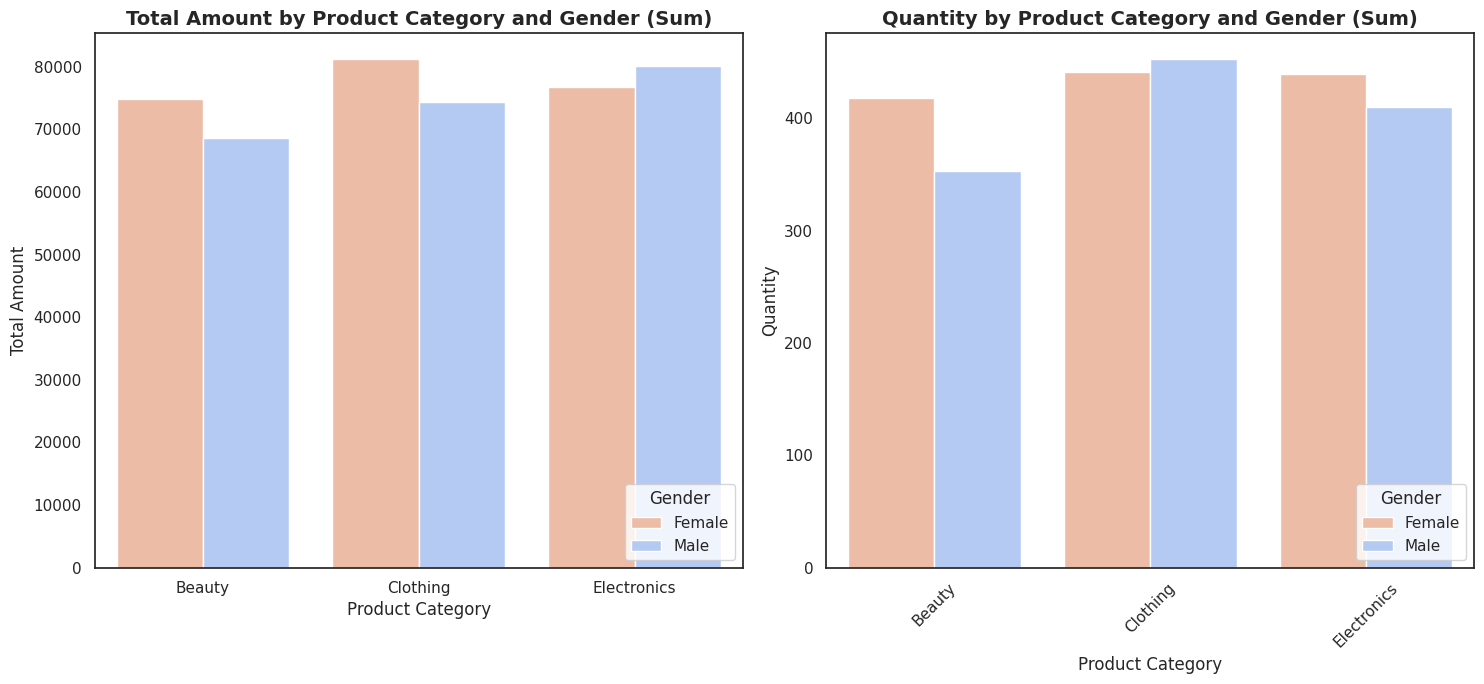

In [24]:
# Agrupar los datos por Product Category y Gender, sumando Total Amount y Quantity
grouped_df = df.groupby(['Product Category', 'Gender']).agg({'Total Amount': 'sum', 'Quantity': 'sum'}).reset_index()

# Crear figura y subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)  # 1 fila, 2 columnas

# Primer gráfico: Total Amount
sns.barplot(
    data=grouped_df,
    x="Product Category",
    y="Total Amount",
    hue="Gender",
    errorbar=None,
    palette="coolwarm_r",
    ax=axes[0]  # Dibujar en el primer subplot
)

axes[0].set_title("Total Amount by Product Category and Gender (Sum)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Product Category", fontsize=12)
axes[0].set_ylabel("Total Amount", fontsize=12)
axes[0].legend(title="Gender", loc="lower right")

# Segundo gráfico: Quantity
sns.barplot(
    data=grouped_df,
    x="Product Category",
    y="Quantity",
    hue="Gender",
    errorbar=None,
    palette="coolwarm_r",
    ax=axes[1]  # Dibujar en el segundo subplot
)

axes[1].set_title("Quantity by Product Category and Gender (Sum)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Product Category", fontsize=12)
axes[1].set_ylabel("Quantity", fontsize=12)
axes[1].legend(title="Gender", loc="lower right")

# Ajustar espaciado y mostrar
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

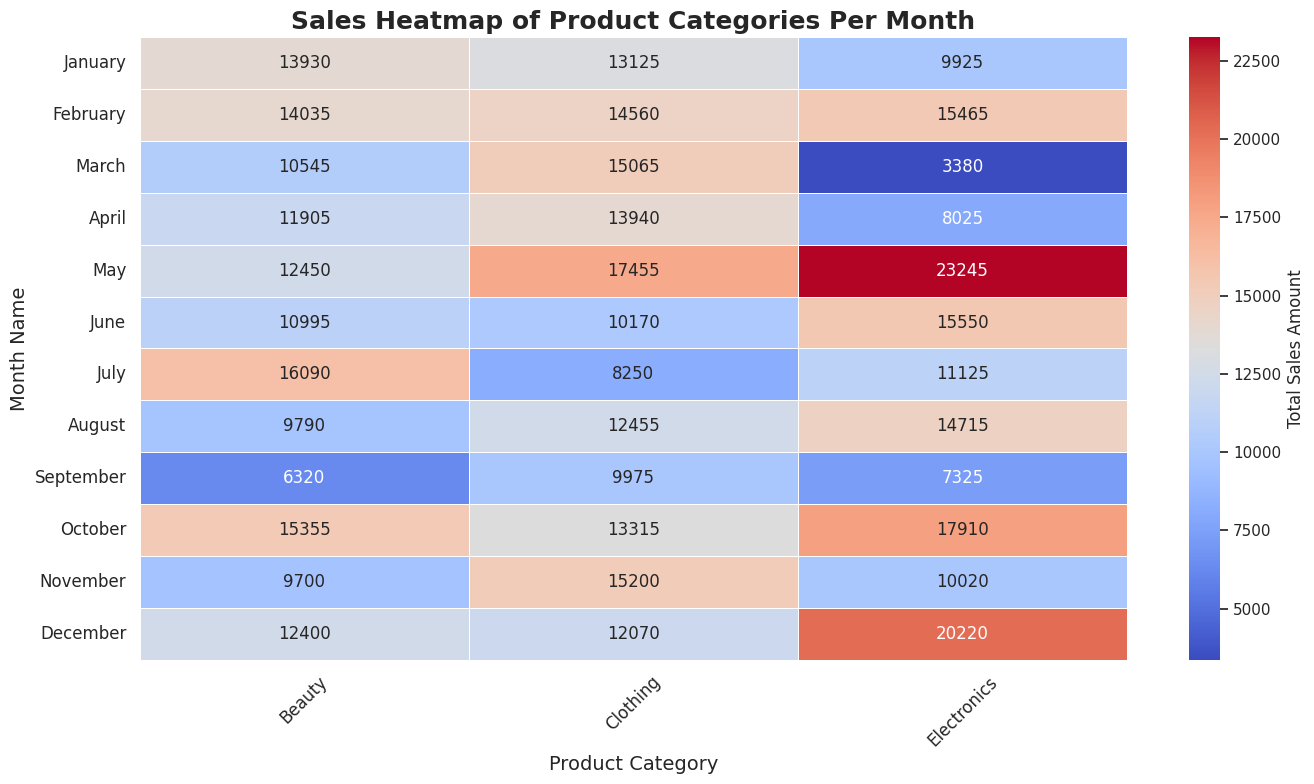

In [25]:
# Graficar Ventas totales por mes y categoría de producto
heatmap_data = df.pivot_table(
    index='Month Name',
    columns='Product Category',
    values='Total Amount',
    aggfunc='sum'
)

heatmap_data = heatmap_data.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Total Sales Amount'}
)

plt.title('Sales Heatmap of Product Categories Per Month', fontsize=18, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month Name', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

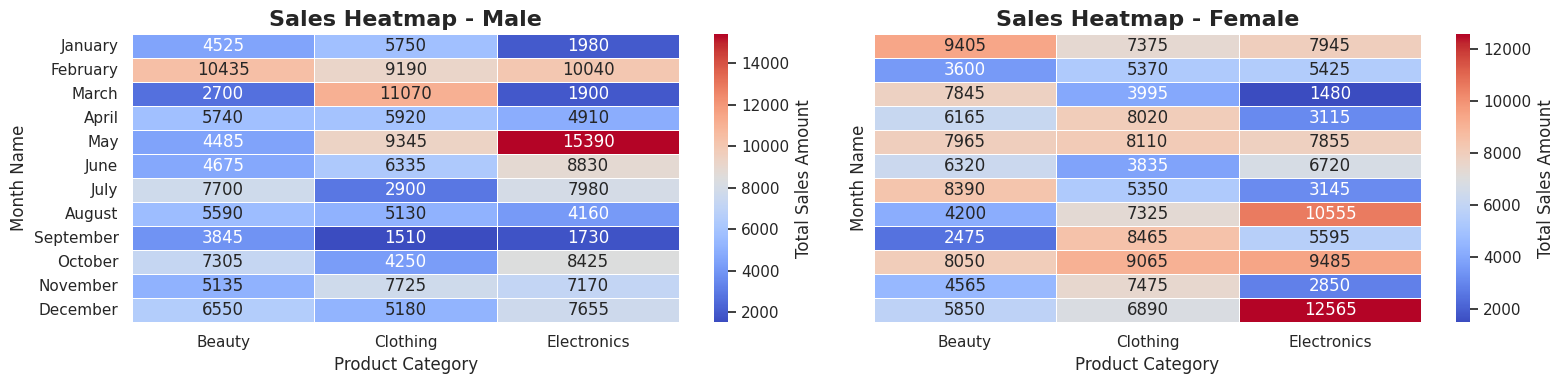

In [26]:
# Graficar Ventas totales por mes y categoría de producto separado por género
genders = df['Gender'].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(8 * len(genders), 4), sharey=True)

for ax, gender in zip(axes, genders):
    gender_data = df[df['Gender'] == gender].pivot_table(
        index='Month Name',
        columns='Product Category',
        values='Total Amount',
        aggfunc='sum'
    ).reindex([
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])

    sns.heatmap(
        gender_data,
        annot=True,
        fmt='.0f',
        cmap='coolwarm',
        linewidths=0.5,
        cbar_kws={'label': 'Total Sales Amount'},
        ax=ax
    )
    ax.set_title(f'Sales Heatmap - {gender}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Product Category', fontsize=12)
    ax.set_ylabel('Month Name', fontsize=12)

plt.tight_layout()
plt.show()


<ipython-input-27-49025c703baa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_data = df.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()


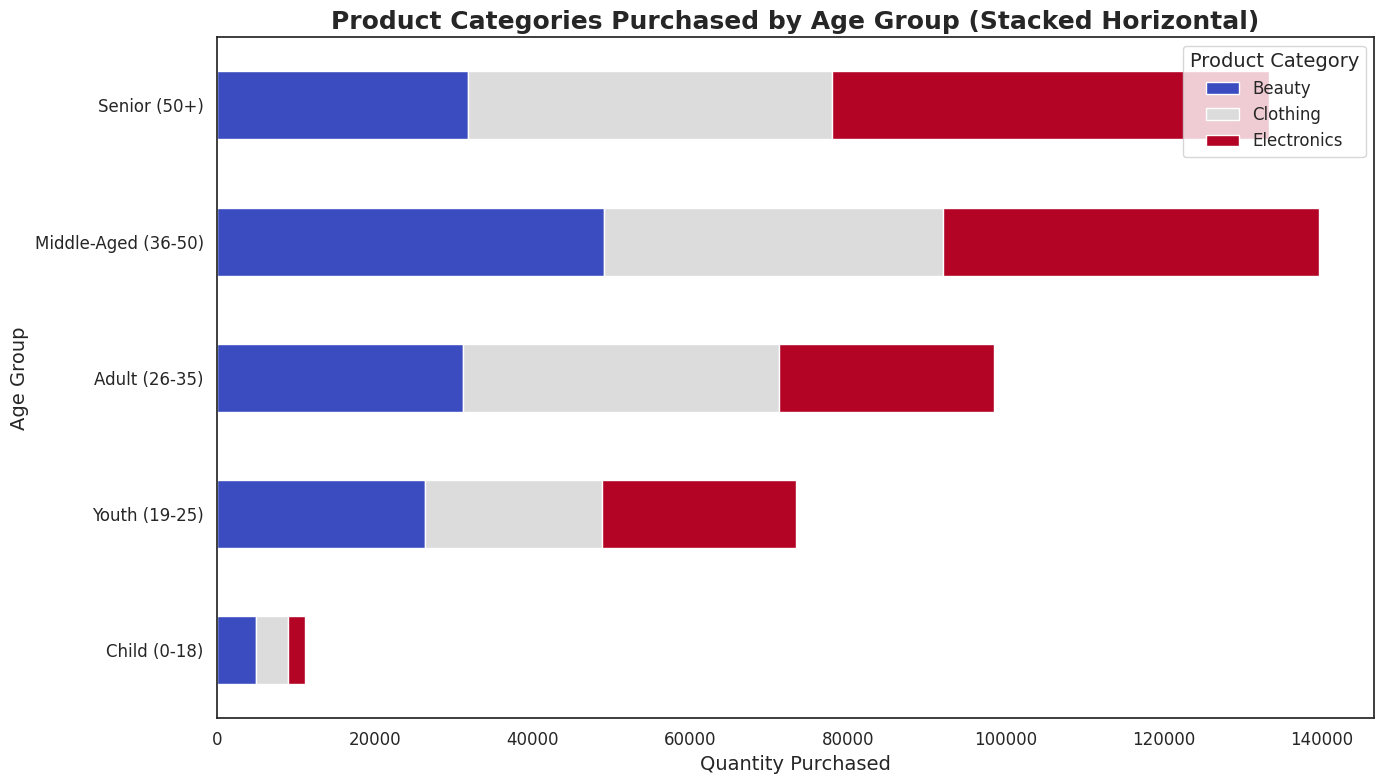

In [27]:
# Agrupar por grupos de edad y categoría de producto según ventas totales
stacked_data = df.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()

stacked_data.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 8),
    colormap='coolwarm'
)

plt.title('Product Categories Purchased by Age Group (Stacked Horizontal)', fontsize=18, fontweight='bold')
plt.xlabel('Quantity Purchased', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Product Category', title_fontsize=14, fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

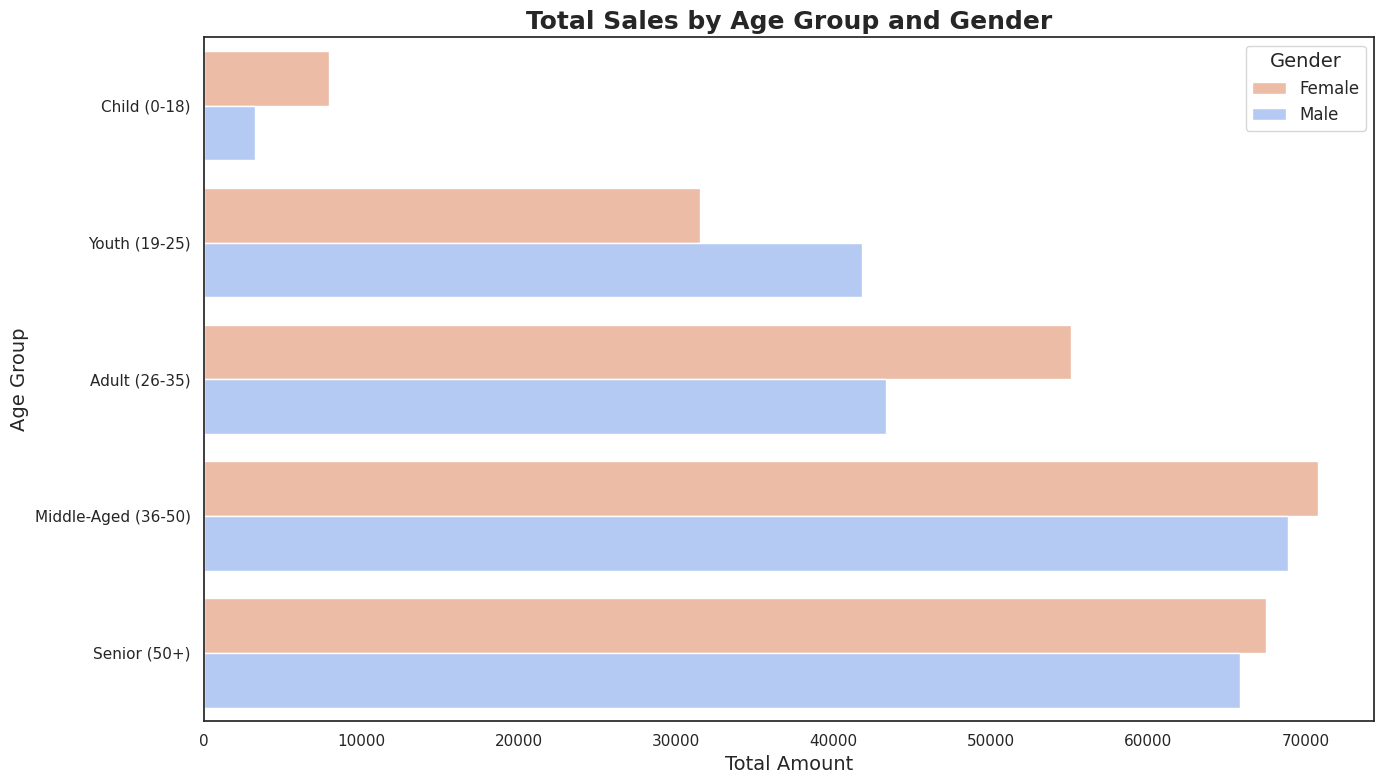

In [28]:
# Agrupar los datos por 'Age Group' y 'Gender', y sumar el 'Total Amount'
grouped_df = df.groupby(['Age Group', 'Gender'], observed=True)['Total Amount'].sum().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_df,  # Usar el DataFrame agrupado, diferente al anterior
    x="Total Amount",
    y="Age Group",
    hue="Gender",
    errorbar=None,  # Eliminar barras de error si no son necesarias
    palette="coolwarm_r"
)

plt.title("Total Sales by Age Group and Gender", fontsize=18, fontweight='bold')
plt.xlabel("Total Amount", fontsize=14)
plt.ylabel("Age Group", fontsize=14)

plt.legend(title="Gender", title_fontsize=14, fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

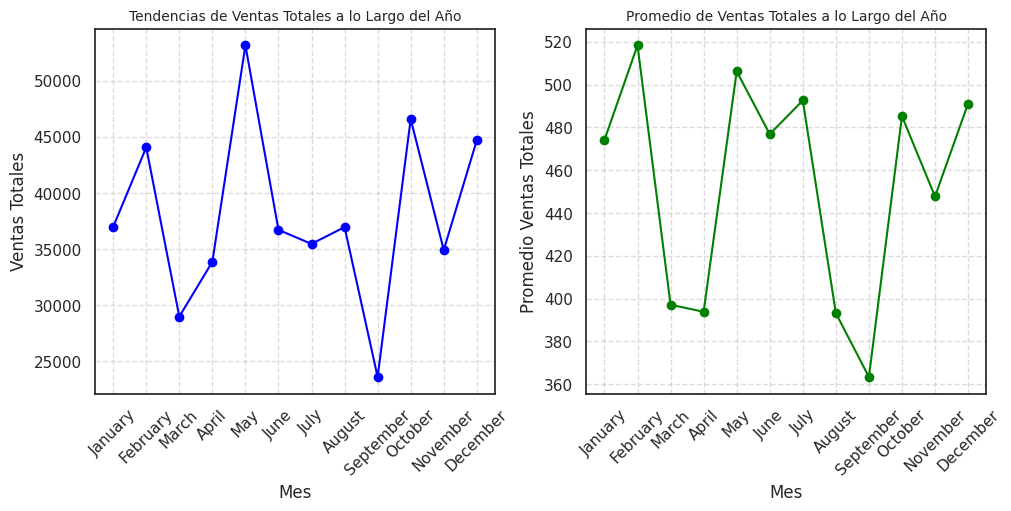

In [29]:
# Asegurarnos de que los meses están ordenados correctamente
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df['Month Name'] = pd.Categorical(df['Month Name'], categories=month_order, ordered=True)

# Agrupar y, sumar o promediar ventas totales por mes
monthly_sales_sum = df.groupby('Month Name', observed=False)['Total Amount'].sum().reindex(month_order)
monthly_sales_mean = df.groupby('Month Name', observed=False)['Total Amount'].mean().reindex(month_order)

# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Gráfico de tendencias de ventas totales
axes[0].plot(monthly_sales_sum.index, monthly_sales_sum.values, marker='o', linestyle='-', color='blue')
axes[0].set_title("Tendencias de Ventas Totales a lo Largo del Año", fontsize=10)
axes[0].set_xlabel("Mes", fontsize=12)
axes[0].set_ylabel("Ventas Totales", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Gráfico de promedios de ventas totales
axes[1].plot(monthly_sales_mean.index, monthly_sales_mean.values, marker='o', linestyle='-', color='green')
axes[1].set_title("Promedio de Ventas Totales a lo Largo del Año", fontsize=10)
axes[1].set_xlabel("Mes", fontsize=12)
axes[1].set_ylabel("Promedio Ventas Totales", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Mostrar la figura
plt.show()

### Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

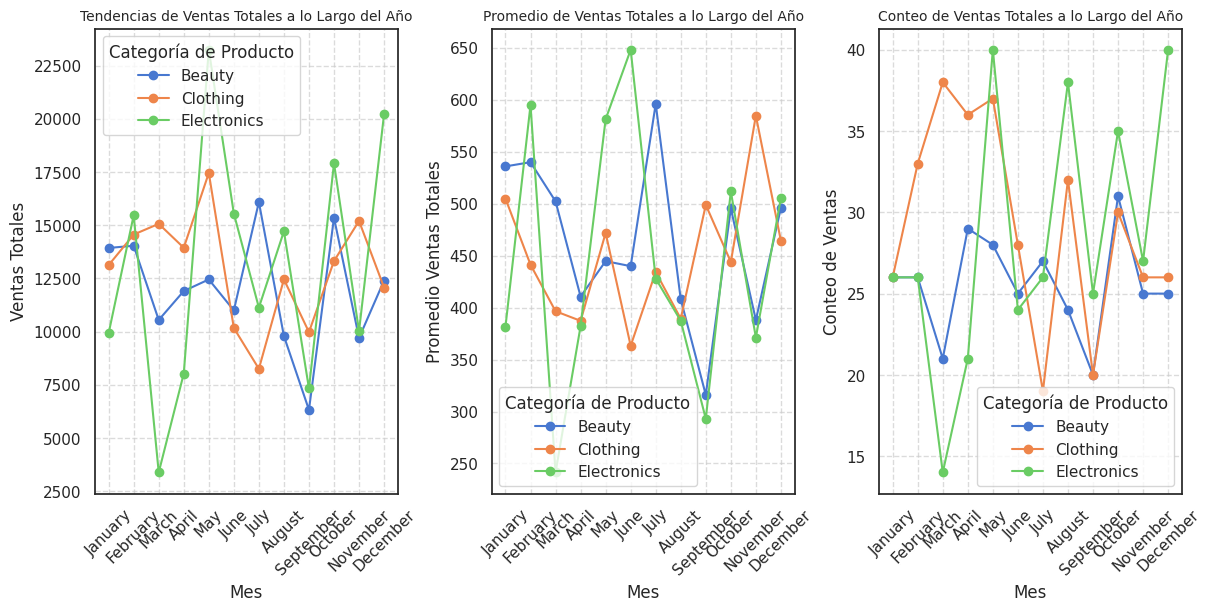

In [34]:
# Asegurarnos de que los meses están ordenados correctamente
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df['Month Name'] = pd.Categorical(df['Month Name'], categories=month_order, ordered=True)

# Agrupar y, sumar, promediar o contar ventas totales por mes y por categoría de producto
monthly_sales_sum = df.groupby(['Month Name', 'Product Category'], observed=True)['Total Amount'].sum().unstack().reindex(month_order)
monthly_sales_mean = df.groupby(['Month Name', 'Product Category'], observed=True)['Total Amount'].mean().unstack().reindex(month_order)
monthly_sales_count = df.groupby(['Month Name', 'Product Category'], observed=True)['Total Amount'].count().unstack().reindex(month_order)

# Crear subgráficos
fig, axes = plt.subplots(1, 3, figsize=(12, 6), constrained_layout=True)

# Gráfico de tendencias de ventas totales por Product Category
for category in monthly_sales_sum.columns:
    axes[0].plot(monthly_sales_sum.index, monthly_sales_sum[category], marker='o', label=category)

axes[0].set_title("Tendencias de Ventas Totales a lo Largo del Año", fontsize=10)
axes[0].set_xlabel("Mes", fontsize=12)
axes[0].set_ylabel("Ventas Totales", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(title="Categoría de Producto")

# Gráfico de promedios de ventas totales por Product Category
for category in monthly_sales_mean.columns:
    axes[1].plot(monthly_sales_mean.index, monthly_sales_mean[category], marker='o', label=category)

axes[1].set_title("Promedio de Ventas Totales a lo Largo del Año", fontsize=10)
axes[1].set_xlabel("Mes", fontsize=12)
axes[1].set_ylabel("Promedio Ventas Totales", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(title="Categoría de Producto")

# Gráfico de conteo de ventas por Product Category
for category in monthly_sales_count.columns:
    axes[2].plot(monthly_sales_count.index, monthly_sales_count[category], marker='o', label=category)

axes[2].set_title("Conteo de Ventas Totales a lo Largo del Año", fontsize=10)
axes[2].set_xlabel("Mes", fontsize=12)
axes[2].set_ylabel("Conteo de Ventas", fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].legend(title="Categoría de Producto")

# Mostrar la figura
plt.show()

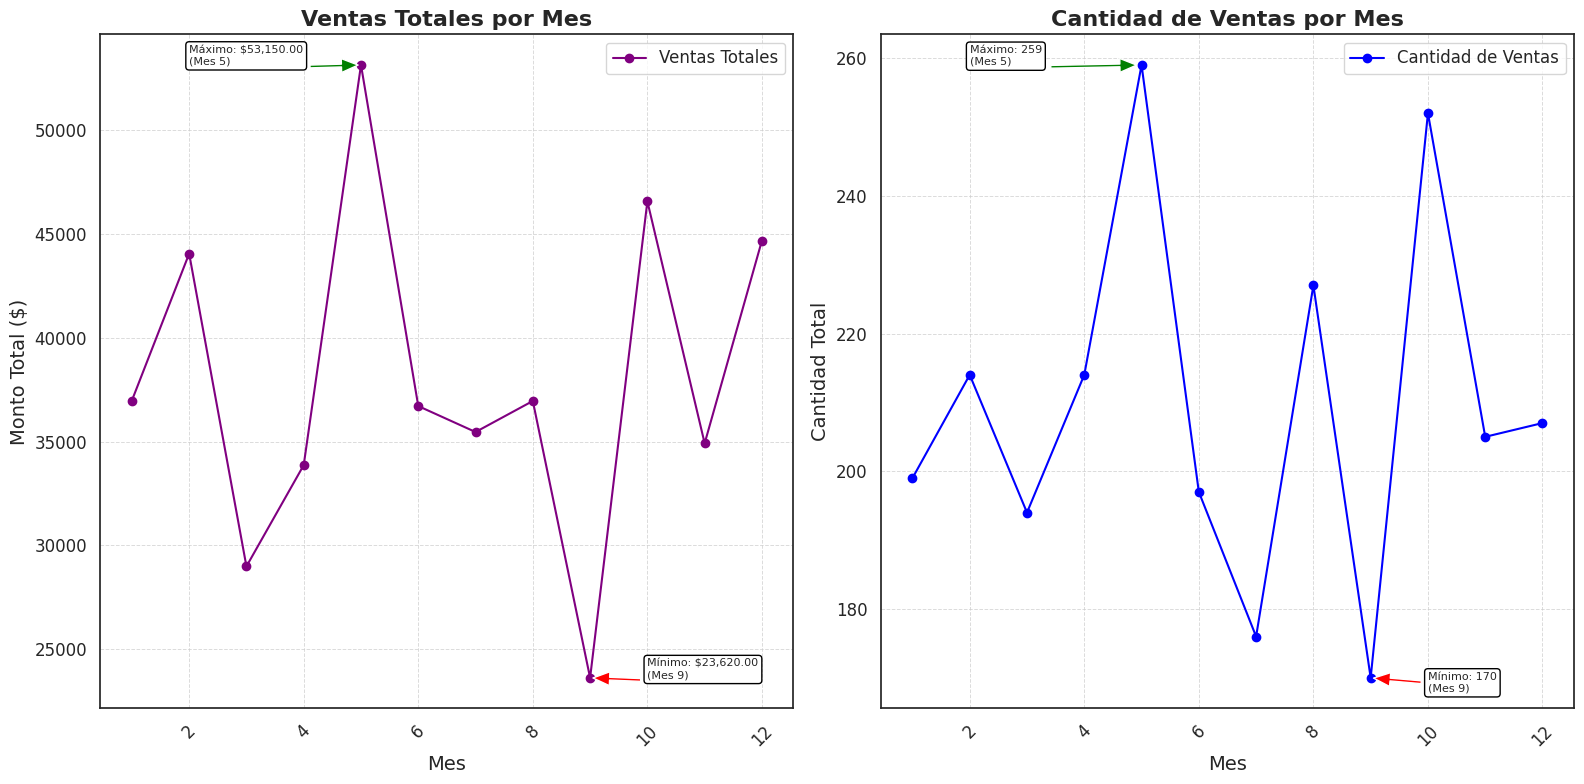

In [35]:
# Agrupa los datos por 'Month Number' y calcula las métricas necesarias.
sales_by_month = df.groupby('Month Number')['Total Amount'].sum()  # Ventas totales
quantity_by_month = df.groupby('Month Number')['Quantity'].sum()  # Cantidad de ventas

# Configura el tamaño de la figura.
plt.figure(figsize=(16, 8))

# Subplot 1: Ventas totales por mes.
plt.subplot(1, 2, 1)
plt.plot(sales_by_month.index, sales_by_month.values, marker='o', linestyle='-', color='purple', label='Ventas Totales')
plt.title('Ventas Totales por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Monto Total ($)', fontsize=14)
plt.grid(which='major', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Anotaciones: máximo y mínimo.
max_sales = sales_by_month.max()
min_sales = sales_by_month.min()
max_month = sales_by_month.idxmax()
min_month = sales_by_month.idxmin()

plt.annotate(f'Máximo: ${max_sales:,.2f}\n(Mes {max_month})',
             xy=(max_month, max_sales),
             xytext=(max_month - 3, max_sales + 15),  # Ajusta posición
             arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=10),
             fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.annotate(f'Mínimo: ${min_sales:,.2f}\n(Mes {min_month})',
             xy=(min_month, min_sales),
             xytext=(min_month + 1, min_sales - 20),  # Ajusta posición
             arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=10),
             fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Subplot 2: Cantidad de ventas por mes.
plt.subplot(1, 2, 2)
plt.plot(quantity_by_month.index, quantity_by_month.values, marker='o', linestyle='-', color='blue', label='Cantidad de Ventas')
plt.title('Cantidad de Ventas por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad Total', fontsize=14)
plt.grid(which='major', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Anotaciones: máximo y mínimo.
max_quantity = quantity_by_month.max()
min_quantity = quantity_by_month.min()
max_month_quantity = quantity_by_month.idxmax()
min_month_quantity = quantity_by_month.idxmin()

plt.annotate(f'Máximo: {max_quantity:,}\n(Mes {max_month_quantity})',
             xy=(max_month_quantity, max_quantity),
             xytext=(max_month_quantity - 3, max_quantity + 0),  # Ajusta posición
             arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=10),
             fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.annotate(f'Mínimo: {min_quantity:,}\n(Mes {min_month_quantity})',
             xy=(min_month_quantity, min_quantity),
             xytext=(min_month_quantity + 1, min_quantity - 2),  # Ajusta posición
             arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=10),
             fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajusta el diseño para evitar superposiciones.
plt.tight_layout()

# Muestra el gráfico.
plt.show()


#### Análisis:
-	Se revisaron valores únicos del dataset para mirar posibles visualizaciones y como obtener información conforme a la variable objetivo
-	Se eliminaron las dos columnas ID dado que no proporcionan algún tipo de información, mas al diferente a se un registro, importante en procesos de trazabilidad, por ejemplo, pero en este caso no
-	Se convierte la columna Date a tipo fecha y se extrae el nombre y número del mes y del día
-	Se clasifican las variables Total Amount y Age en rangos particulares para posibles análisis
-	Primero se revisaron patrones o tendencias con dos variables y el cruce de estas mismas siempre con el total de ventas. Se puede apreciar que las mayores ventas en belleza son para las mujeres, así como en la ropa, mientras que en electrónica son los hombres quienes contribuyen con las mayores ventas en esta categoría. Y al revisar la cantidad de ventas (unidades), se mantiene que en belleza sean las mujeres las que más compran, pero en ropa y electrónica se da una inversión, siendo los hombres quienes compran más unidades de ropa, y las mujeres más unidades de electrónica
-	Con el Heatmap de categoría de productos por mes, según las ventas totales, se puede apreciar que en belleza las mayores ventas se dieron en julio y octubre, seguido de febrero, enero y diciembre, y las menores en septiembre. En ropa, las mayores ventas se dieron en mayo, seguido de noviembre y marzo, con las menores ventas en julio y septiembre. Y en electrónicos las mayores ventas se dieron en mayo, diciembre, octubre junio, febrero y agosto, respectivamente, y las menores ventas en marzo y septiembre. Cabe resaltar que en Septiembre, para las tres categorías se dieron ventas bajas comparadas con el resto de los meses.
-	Por otra parte, al separar el punto anterior, las ventas totales para los hombres se dieron en belleza en el mes de febrero, en ropa en el mes de marzo, y en electronica el mes de mayo, pero es en septiembre donde se dan la mayoría de las ventas más bajas. En el caso de las mujeres, las mayores ventas de belleza se dan en enero, en ropa en octubre, y en electronica en diciembre.
-	Si bien no se hizo un gráfico para ver tendencias según la edad, el usar grupos de edad facilitó observar que, entre los 36 y 50 años es donde se dan las mayores ventas, seguido del grupo de más de 50 años, y en ambos casos son las mujeres las que realizan la mayoría de estas compras.

-	En los gráficos lineales se confirma que septiembre es el mes con menor ventas, y que mayo es el mes con mayor ventas, seguido de octubre diciembre y febrero, pero en promedio, es febrero quien tiene mejores ventas promedio.


**Nota**
Algunos de estos códigos provienen de Core previos, por lo que se reutilizó el código conforme es el mismo proyecto 1


# Parte 2: Preprocesamiento de Datos



## 1) Transformación de Columnas:


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1000 non-null   datetime64[ns]
 1   Gender                1000 non-null   object        
 2   Age                   1000 non-null   int64         
 3   Product Category      1000 non-null   object        
 4   Quantity              1000 non-null   int64         
 5   Price per Unit        1000 non-null   int64         
 6   Total Amount          1000 non-null   int64         
 7   Month Number          1000 non-null   int32         
 8   Month Name            1000 non-null   category      
 9   Day Number            1000 non-null   int32         
 10  Day Name              1000 non-null   object        
 11  Sales Classification  1000 non-null   object        
 12  Age Group             1000 non-null   category      
dtypes: category(2), dat

### Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.


### Realizar codificación de variables categóricas y escalado de variables numéricas.

## 2) Pipelines:


### Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
# Definir columnas por tipo
num_X = ['Age', 'Quantity', 'Price per Unit', 'Month Number', 'Day Number']
cat_X = ['Gender', 'Product Category', 'Sales Classification', 'Age Group']

In [100]:
# Crear preprocesadores para diferentes tipos de columnas
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# cat_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#    ('label_encoder', OrdinalEncoder())
#])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

In [110]:
# Combinar transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_X),
        ('cat', cat_transformer, cat_X)
    ])

# Crear pipeline completo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    #('regressor', LinearRegression())
])

# Preparar datos
X = df[num_X + cat_X]
y = df['Total Amount']

In [111]:
# Aplicar el Pipeline
X_transformed = preprocessor.fit_transform(X)

In [112]:
# Ajustar el modelo para que las transformaciones se realicen y se obtengan las categorías de OneHotEncoder
model_pipeline.fit(df[num_X + cat_X], y)

# Verificar cuántas columnas se generan en total después de la transformación
X_transformed = model_pipeline.named_steps['preprocessor'].transform(df[num_X + cat_X])

# Generar los nombres de las columnas, considerando la codificación OneHot
num_columns = num_X  # Las columnas numéricas no cambian
cat_columns = []

# Para OneHotEncoder, usamos el número de categorías transformadas
# Accedemos al OneHotEncoder y obtenemos las categorías
onehot_encoder = preprocessor.transformers_[1][1].named_steps['onehot']

# Recorremos las columnas categóricas para generar los nombres de las columnas OneHot
for i, col in enumerate(cat_X):
    categories = onehot_encoder.categories_[i]  # Acceder a las categorías del OneHotEncoder
    cat_columns.extend([f"{col}_{category}" for category in categories[1:]])  # Excluimos la primera categoría si se usa 'drop="first"'

# Combinamos las columnas numéricas y categóricas
transformed_columns = num_columns + cat_columns

# Convertimos X_transformed a un DataFrame con los nombres de columnas adecuados
X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_columns)

# Concatenar con 'Total Amount' de df
df_transformed = pd.concat([X_transformed_df, df['Total Amount']], axis=1)

# Mostrar el resultado
print(df_transformed.head())

        Age  Quantity  Price per Unit  Month Number  Day Number  Gender_Male  \
0 -0.540565  0.429265       -0.685123      1.289760    0.980012          1.0   
1 -1.125592 -0.453996        1.688464     -1.318158    1.318336          0.0   
2  0.629489 -1.337258       -0.790615     -1.607926   -0.260510          1.0   
3 -0.321180 -1.337258        1.688464     -0.448852    0.641688          1.0   
4 -0.833078 -0.453996       -0.685123     -0.448852   -1.049932          1.0   

   Product Category_Clothing  Product Category_Electronics  \
0                        0.0                           0.0   
1                        1.0                           0.0   
2                        0.0                           1.0   
3                        1.0                           0.0   
4                        0.0                           0.0   

   Sales Classification_Low  Sales Classification_Medium  \
0                       1.0                          0.0   
1                       0.

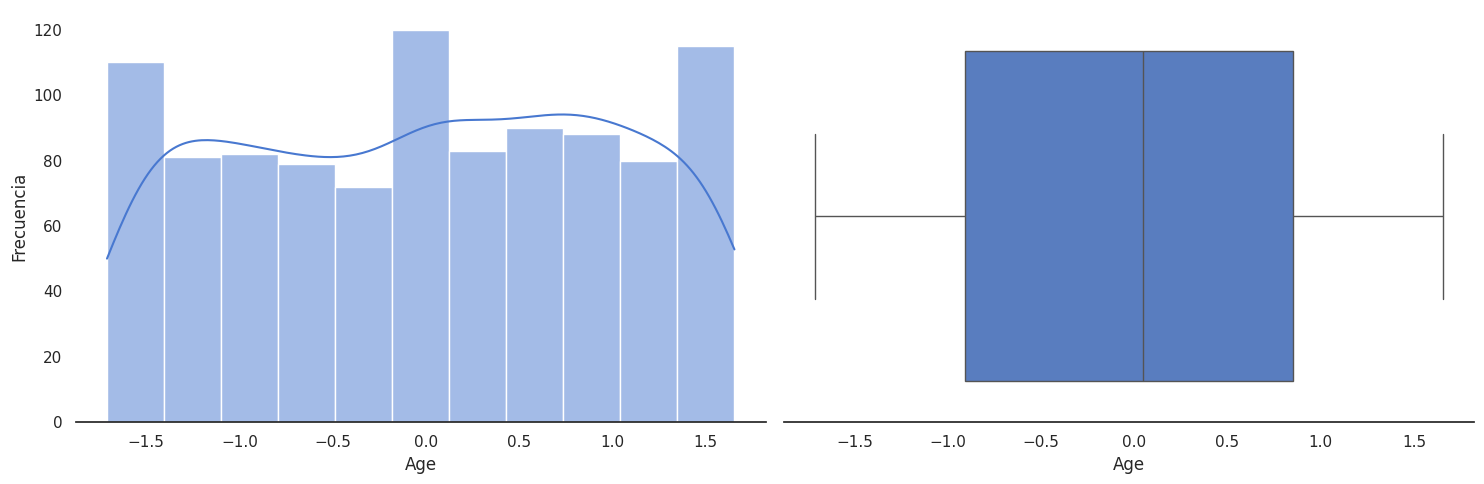

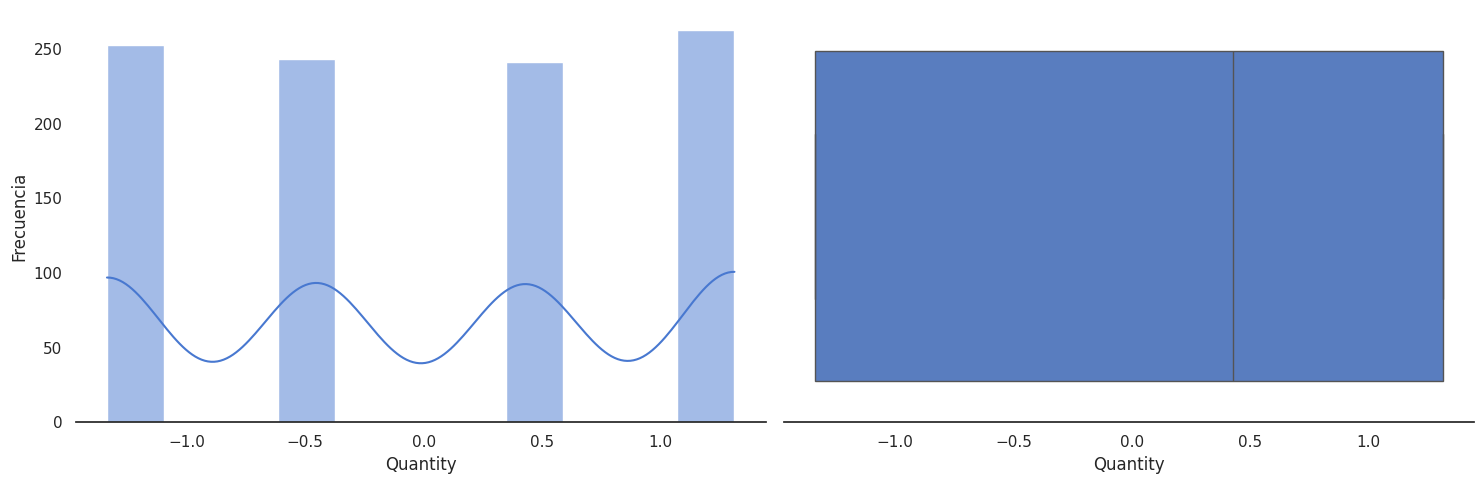

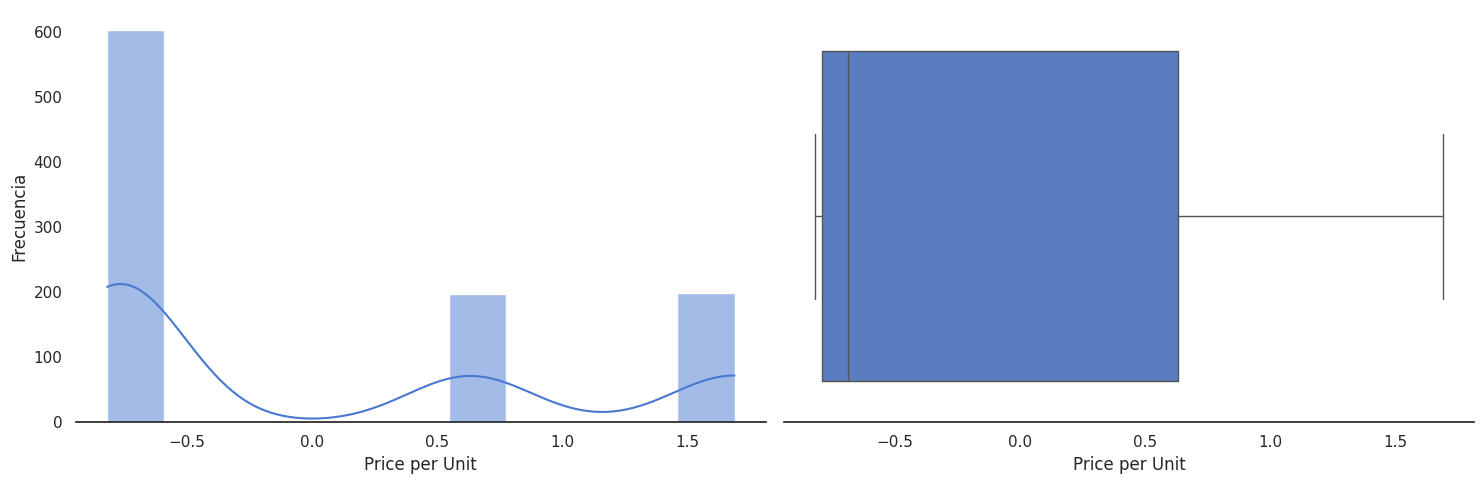

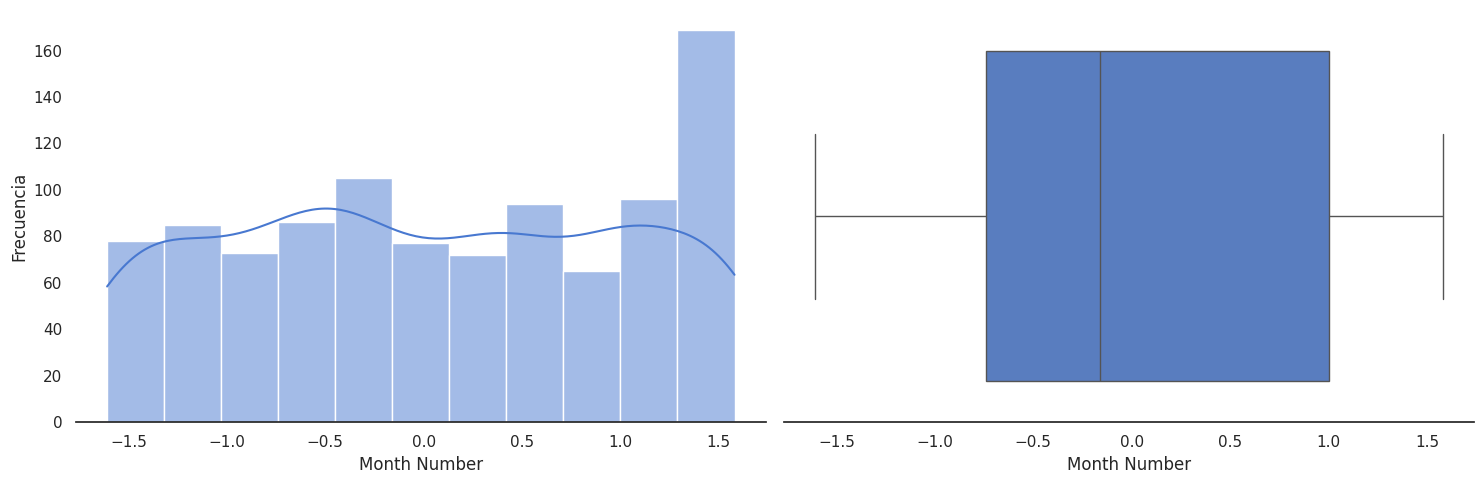

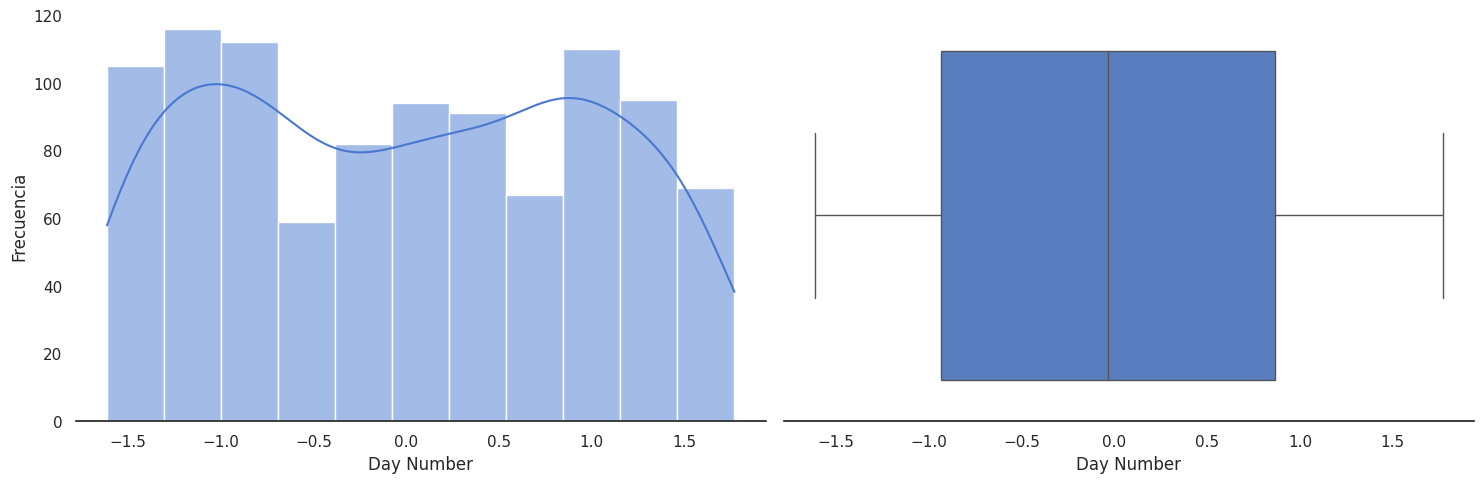

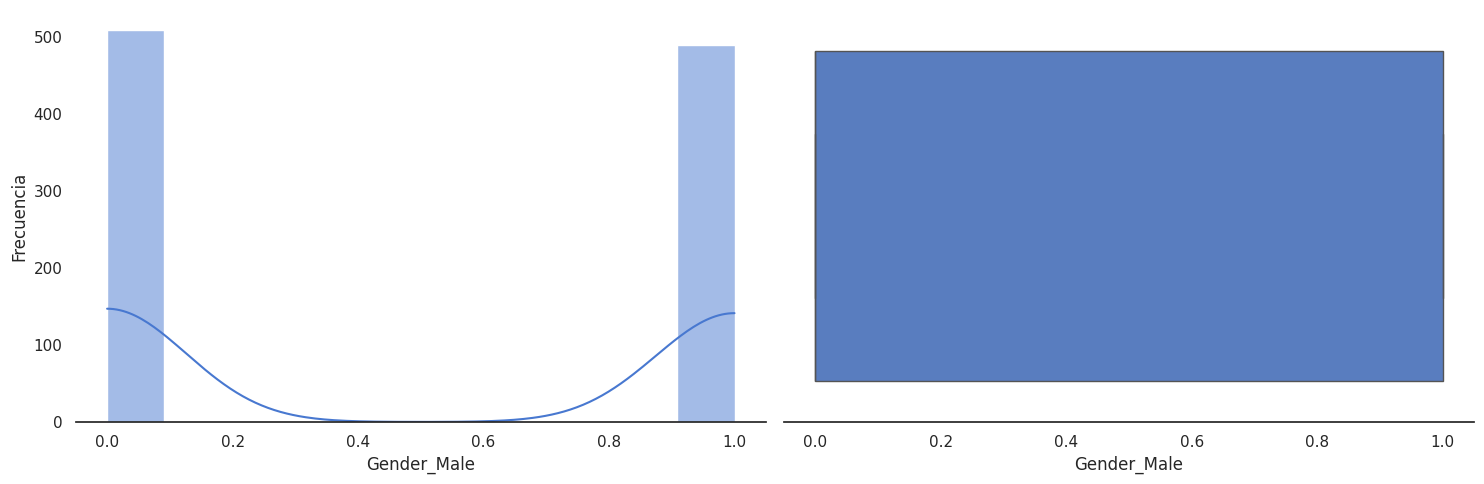

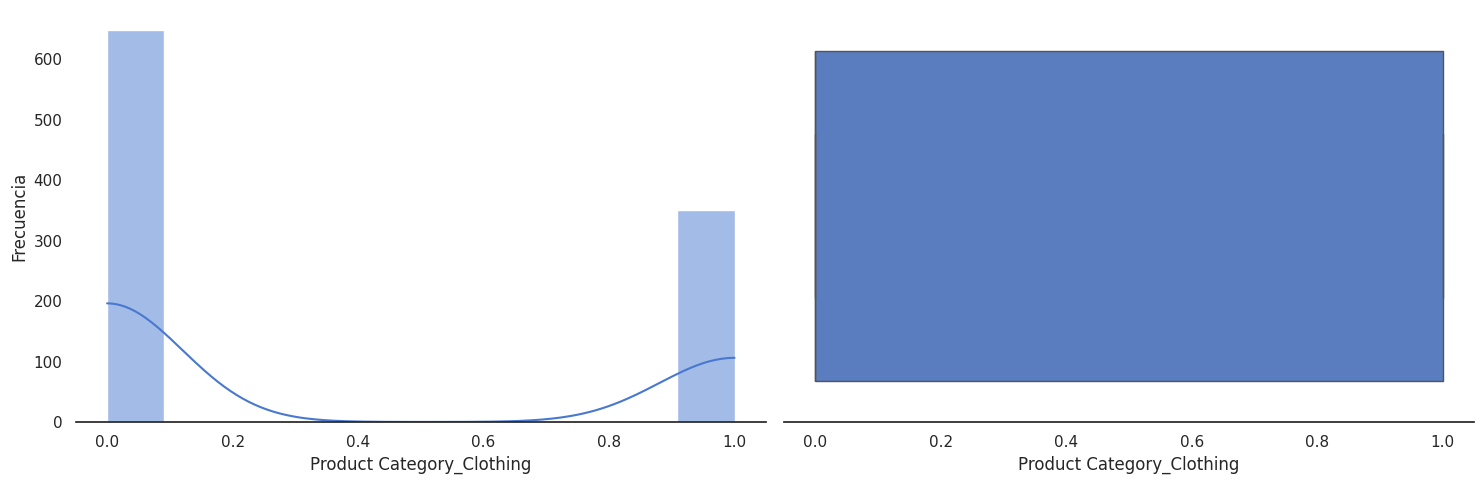

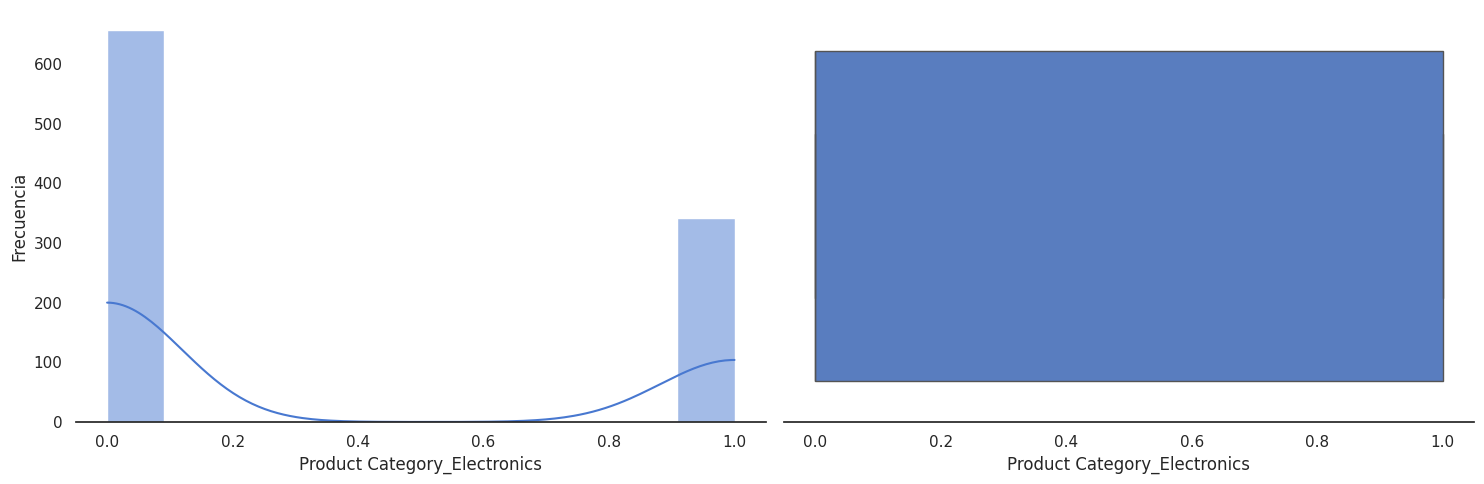

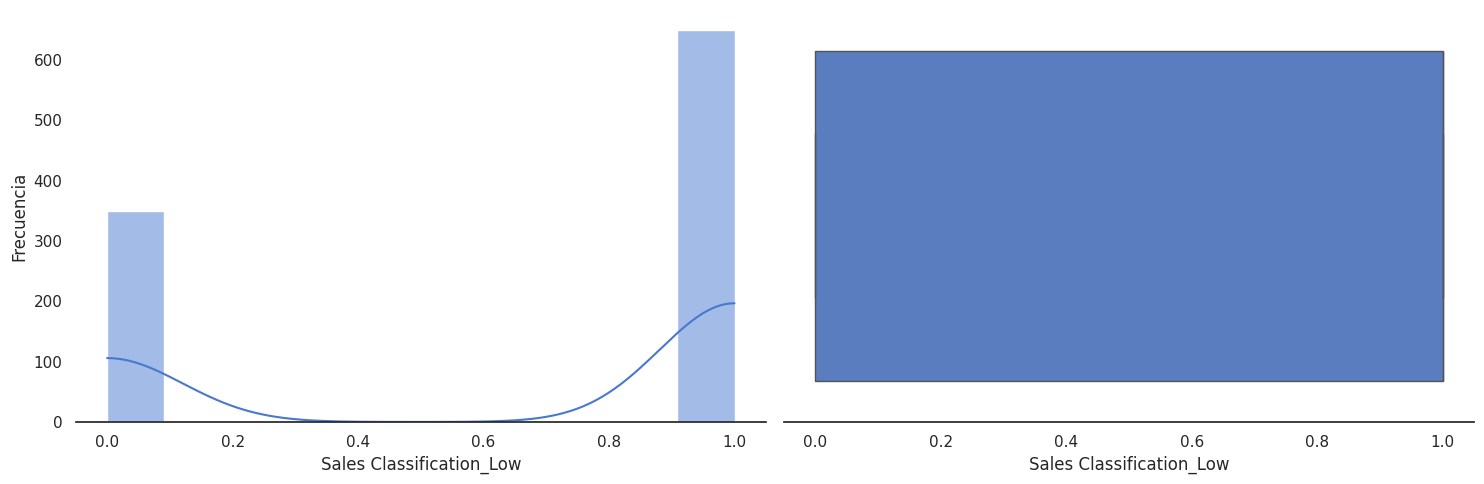

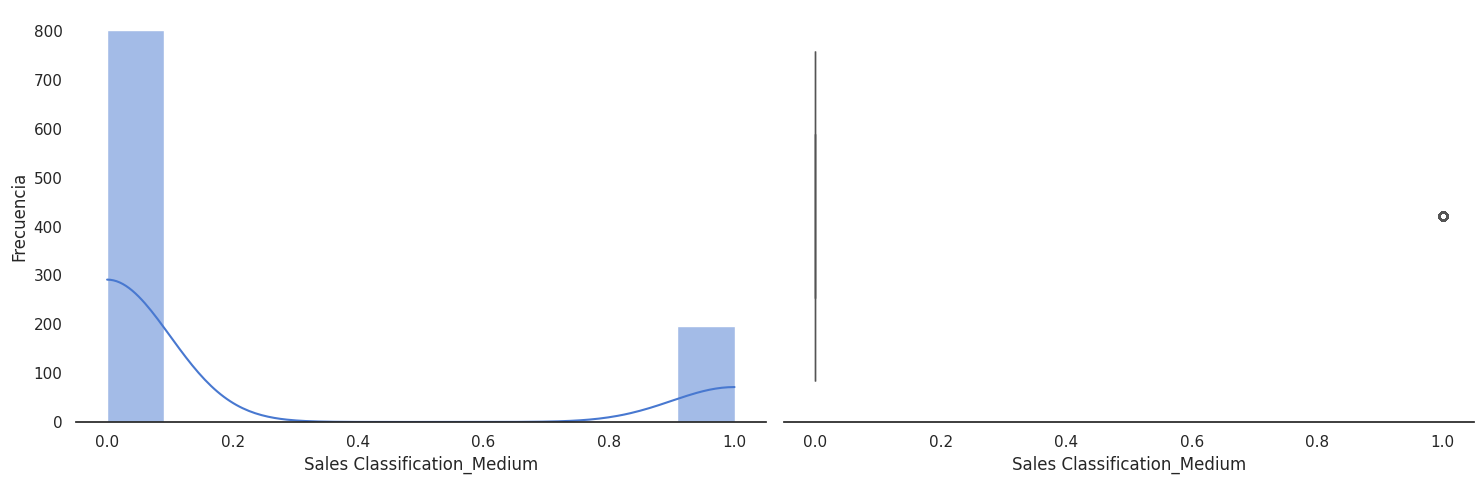

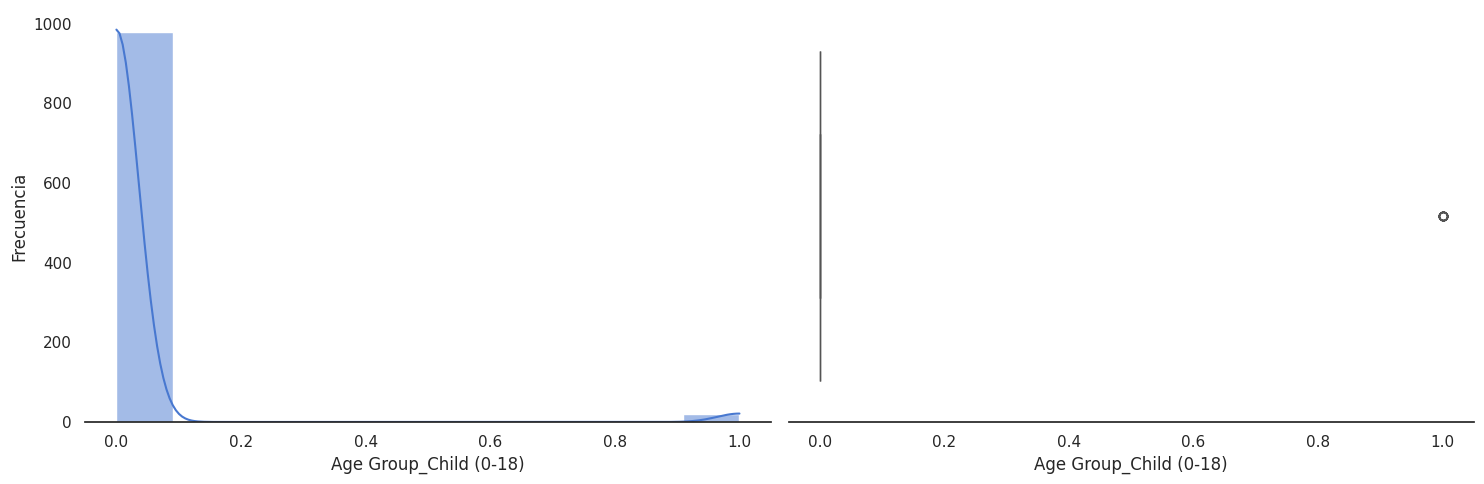

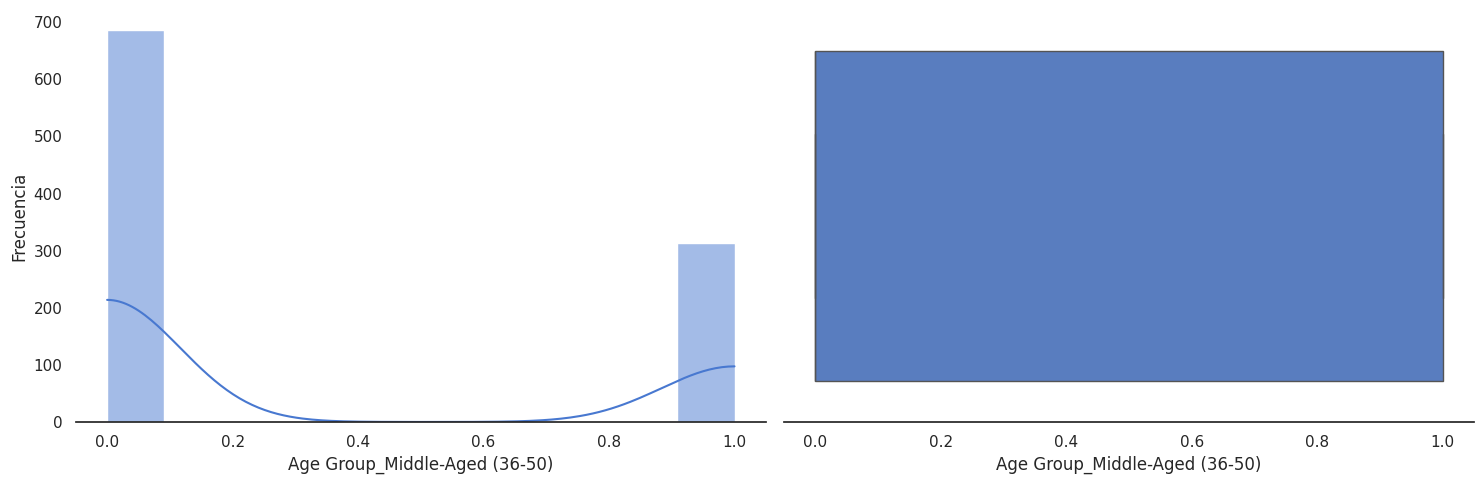

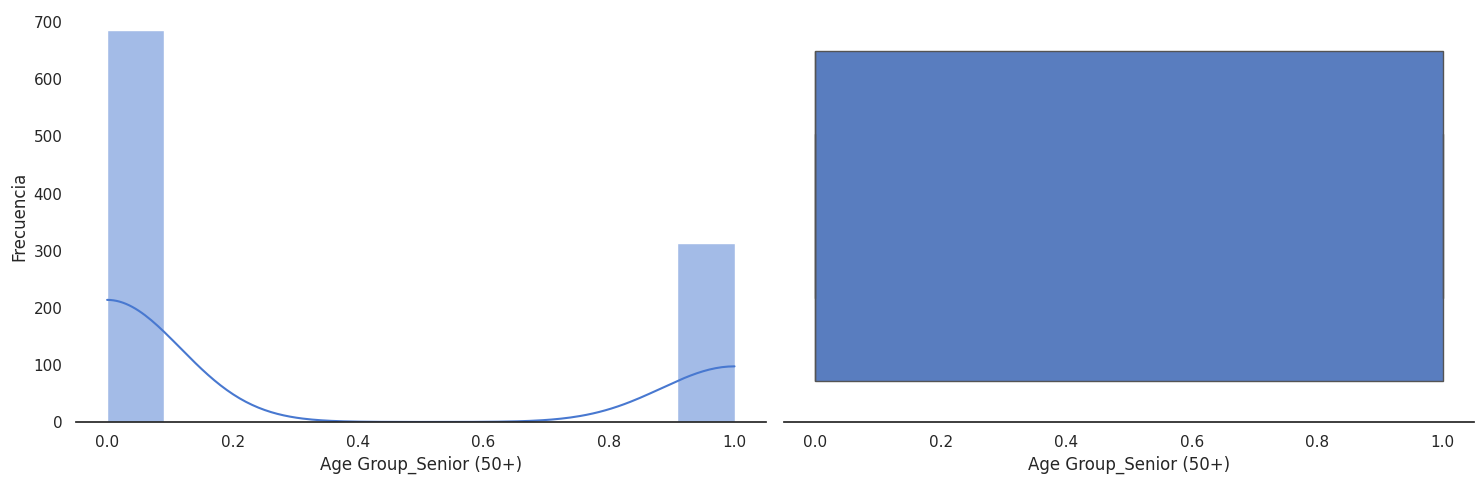

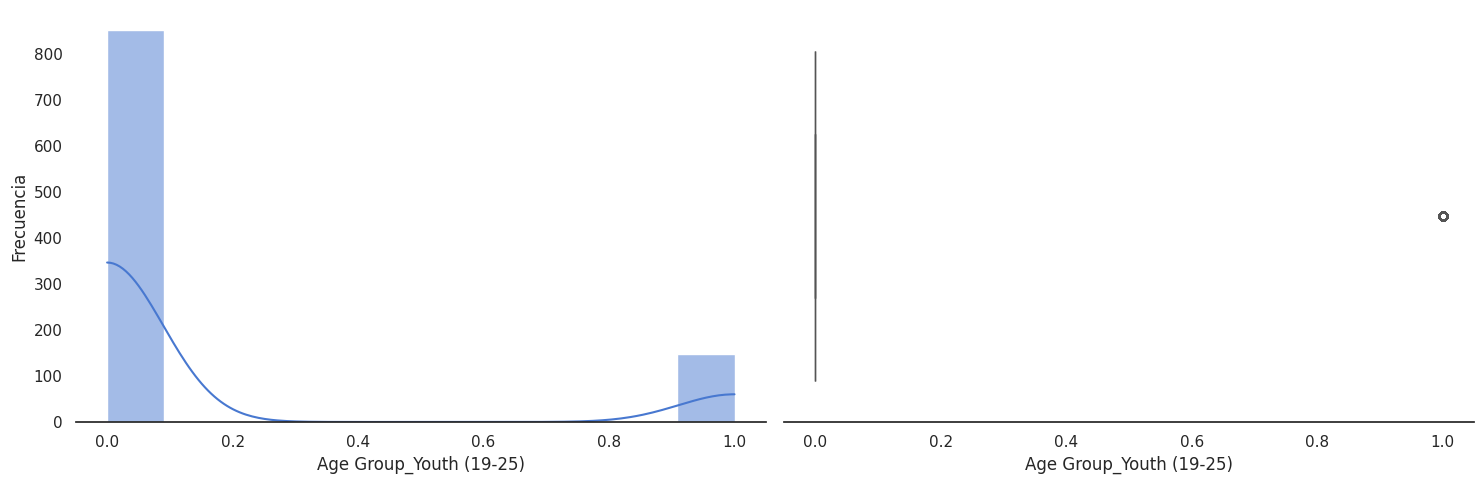

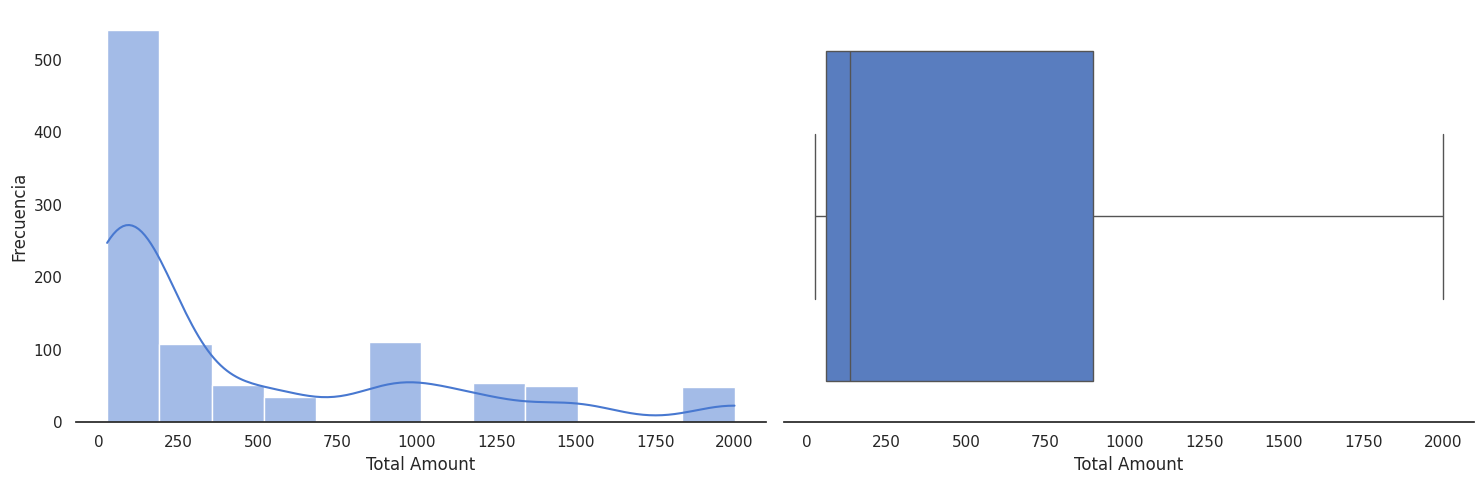

In [113]:
vis_hist_boxplot(df_transformed)

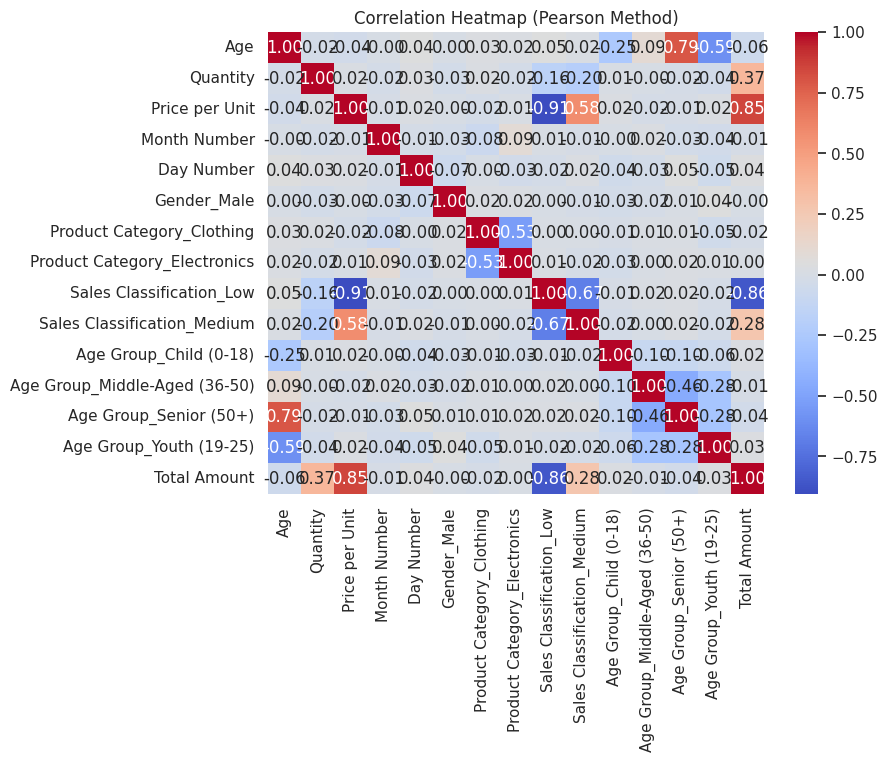

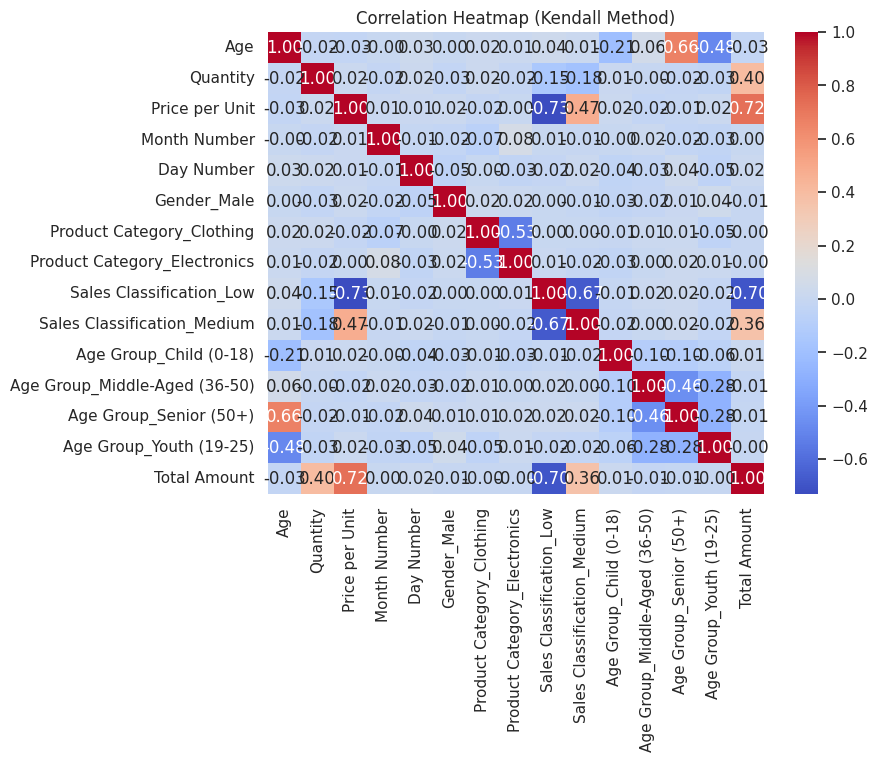

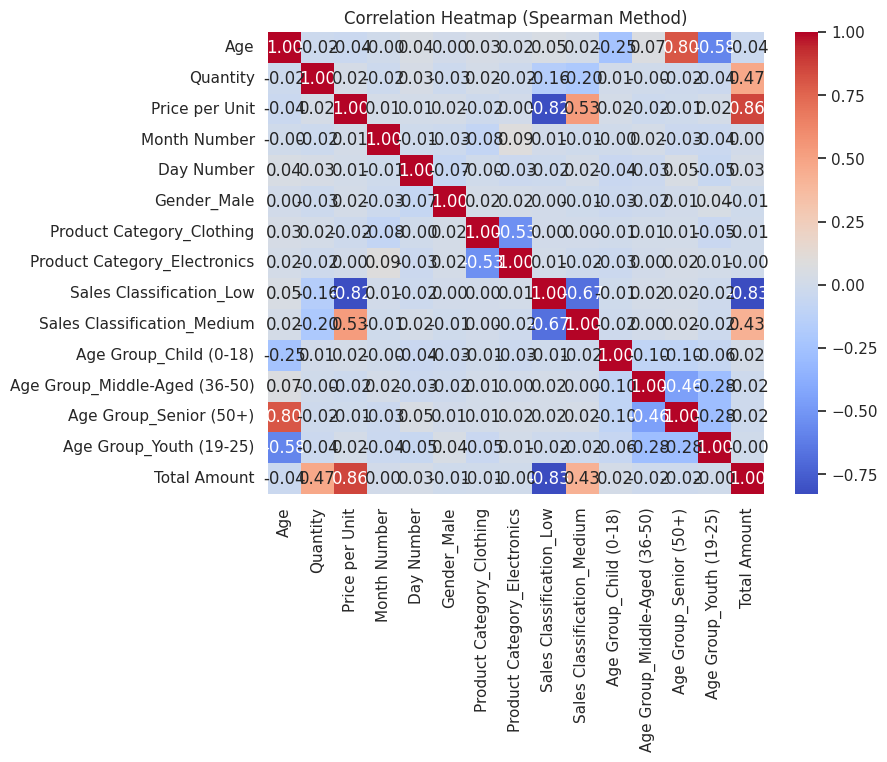

In [114]:
correlaciones(df_transformed)

#### Análisis:
-	Aquí se hace todo junto por fines prácticos y porque según como lo veo, hay cosas que van juntas y no es fácil separarlas, más aún como se solicitan en los enunciados
-	Se seleccionaron las columnas de tipo texto y de tipo numérico para realizar las respectivas transformaciones (imputación, codificación o escalado), y con ColumnTransformer y Pipeline, se realizó el preprocesamiento
-	Se revisó nuevamente visualizaciones y correlaciones para seleccionar características, encontrando lo siguiente:
-	Con OrdinalEncoder, no se obtuvo alguna correlación alta que justifique varias características (solo cantidad con -0.4, el resto fuero inferior a 0.07 o -0.02). Mientras que, con OneHotEncoder se otuvieron más correlaciones, el hecho de trabajar con una variable que está “dividida” y que además es una transformación de la variable objetivo, no lo veo claro o tampoco sabría como desarrollarlo bien (la explicación me refiero).
-	Conforme lo anterior, como no hay correlación con la clasificación de ventas con alguna de las otras variables de manera directa, sino que se da cuando se divide la variable en las 3 categorías con OneHotEncoder, se supondría que la no hay posibilidad, al menos en este momento, de que el problema sea de clasificación, así que se trataría como un problema de regresión.


# Parte 3: Benchmarking de Técnicas de Machine Learning


In [116]:
# Seleccionar características
X = df[['Quantity', 'Price per Unit']]
y = df['Total Amount']

## 1) Selección de Modelos:


### Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).


### Utilizar validación cruzada para evaluar el rendimiento de los modelos.

## 2) Comparación de Modelos:


### Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.


### Seleccionar el mejor modelo basado en las métricas obtenidas.

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Crear diccionario de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Lista de métricas a evaluar
scoring = {
    'R²': 'r2',  # Coeficiente de determinación
    'RMSE': 'neg_root_mean_squared_error',  # Raíz del error cuadrático medio
    'MAE': 'neg_mean_absolute_error',  # Error absoluto medio
    'MSE': 'neg_mean_squared_error'  # Error cuadrático medio
}

# Evaluar cada modelo
for name, model in models.items():
    print(f"\n{name}:")

    for metric_name, metric in scoring.items():
        scores = cross_val_score(model, X, y, cv=5, scoring=metric)

        # Si es una métrica negativa, convertir a positiva
        if 'neg_' in metric:
            scores = -scores

        print(f"{metric_name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Linear Regression:
R²: 0.8455 (+/- 0.0484)
RMSE: 215.5777 (+/- 7.4804)
MAE: 177.4709 (+/- 4.4644)
MSE: 46487.7349 (+/- 3212.1960)

Ridge:
R²: 0.8455 (+/- 0.0483)
RMSE: 215.5786 (+/- 7.5158)
MAE: 177.4328 (+/- 4.4662)
MSE: 46488.2335 (+/- 3227.3418)

Lasso:
R²: 0.8455 (+/- 0.0481)
RMSE: 215.5850 (+/- 7.6402)
MAE: 177.2999 (+/- 4.4727)
MSE: 46491.4673 (+/- 3280.5538)

Decision Tree:
R²: 1.0000 (+/- 0.0000)
RMSE: 0.0000 (+/- 0.0000)
MAE: 0.0000 (+/- 0.0000)
MSE: 0.0000 (+/- 0.0000)

Random Forest:
R²: 1.0000 (+/- 0.0000)
RMSE: 0.0000 (+/- 0.0000)
MAE: 0.0000 (+/- 0.0000)
MSE: 0.0000 (+/- 0.0000)


In [121]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate

# 1. Forma básica (la que ya vimos antes)
scores = cross_val_score(model, X, y, cv=5)  # 5 folds

# 2. Forma más detallada con KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Forma más completa con cross_validate (te da más métricas)
metrics = cross_validate(model, X, y, cv=5,
                        scoring={
                            'r2': 'r2',
                            'rmse': 'neg_root_mean_squared_error',
                            'mae': 'neg_mean_absolute_error'
                        },
                        return_train_score=True)  # También ver scores de training

# Imprimir resultados
print("Test R²:", metrics['test_r2'].mean())
print("Test RMSE:", -metrics['test_rmse'].mean())
print("Test MAE:", -metrics['test_mae'].mean())
print("\nTrain R²:", metrics['train_r2'].mean())
print("Train RMSE:", -metrics['train_rmse'].mean())
print("Train MAE:", -metrics['train_mae'].mean())

Test R²: 1.0
Test RMSE: -0.0
Test MAE: -0.0

Train R²: 1.0
Train RMSE: -0.0
Train MAE: -0.0


#### Análisis:
-	Se realizó la separación de los datos en X y y, se corrieron 5 modelos de regresión, se entrenaron y evaluaron, seleccionando métricas a evaluar
-	En general los árboles dieron los mejores resultados, pero estos pueden deberse a diferentes cosas como “el escalado” y además, como no se uso ninguna de las variables categóricas codificadas, este podría ser la mejor opción, aunque no genera ningún tipo de error (MSE o MAE), en cuanto a los otros tres modelos de regresión que son directamente lineales, se obtiene un buen R2, aunque el MSE tiende a ser bastante alto, y los valores de las métricas son similares en los tres modelos


# Parte 4: Análisis de Métricas


## 1) Informe de Clasificación:


### Generar un informe de clasificación para los modelos evaluados.


### Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.


## 2) Curva ROC y AUC:


### Crear y visualizar la curva ROC para los modelos de clasificación binaria.


### Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

               Model    RMSE     MAE       MSE  R-squared
0  Linear Regression  213.46  176.19  45566.85       0.85
1              Ridge  213.46  176.16  45566.88       0.85
2              Lasso  213.47  176.02  45567.63       0.85
3      Decision Tree    0.00    0.00      0.00       1.00
4      Random Forest    0.00    0.00      0.00       1.00




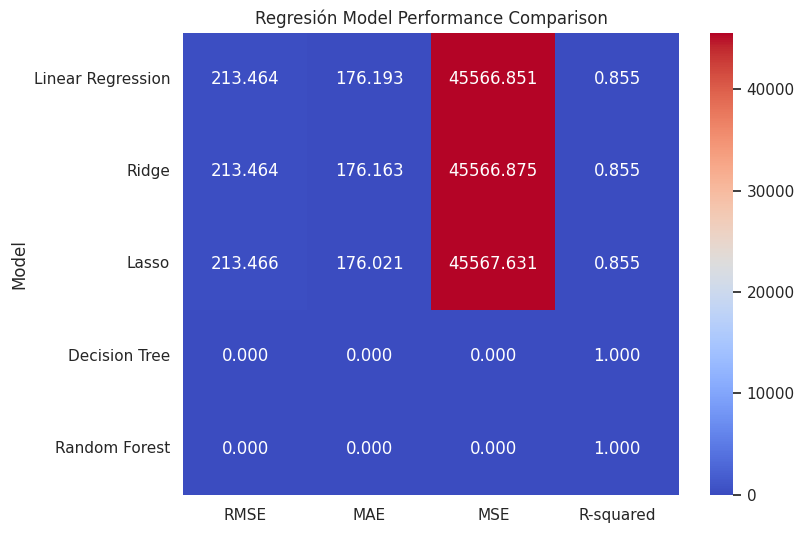

In [127]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Definir los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Diccionario para almacenar los resultados
results = []

# Ajustar y evaluar cada modelo
for model_name, model in models.items():
    model.fit(X, y)  # Ajuste del modelo

    # Realizar predicciones
    y_pred = model.predict(X)

    # Calcular las métricas de evaluación
    rmse = np.sqrt(mean_squared_error(y, y_pred))  # Root Mean Squared Error
    mae = mean_absolute_error(y, y_pred)  # Mean Absolute Error
    r2 = r2_score(y, y_pred)  # R-squared

    # Almacenar los resultados
    results.append({
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mean_squared_error(y, y_pred),
        'R-squared': r2
    })

# Crear un DataFrame para mostrar los resultados
results_df = pd.DataFrame(results)

# Mostrar el DataFrame con los resultados
print(results_df.round(2))
print("\n")

# Visualizar en forma de tabla (opcional)
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una matriz de calor para las métricas
metrics = results_df.drop('Model', axis=1).set_index(results_df['Model'])
plt.figure(figsize=(8, 6))
sns.heatmap(metrics, annot=True, cmap='coolwarm', fmt='.3f', cbar=True)
plt.title('Regresión Model Performance Comparison')
plt.show()


#### Análisis:
-	Dado que el ejercicio fue de Regresión y no de clasificación, algunas cosas como el informe de clasificación, la matriz de confusión, las curvas ROC y AUC, no aplican
-	Así que se presenta una tabla y una visualización heatmap de las métricas de los modelos evaluados, por lo que se confirma con mayor claridad que los mejores modelos de regresión en este ejercicio son los árboles de decisión para regresión y el random forest, aunque los modelos de regresión lineal, ridge  y lasso, pueden también ser una buena opción dependiendo de lo que se requiera observar o comprar con los modelos, ya que, al ser solo dos características las que requiere el modelo, puede ser bastante útil dicha interpretación (valores dados por diferentes modelos y porque no, una media de los mismos u observaciones de estos para tener en cuenta rangos, aunque para ello habría sido más útil intervalos de confianza)


# Parte 5: Presentación de Resultados



## 1) Preparación de la Presentación (One-Page en PPT):


### Introducción y objetivos del proyecto.

### Descripción del conjunto de datos.


### Principales análisis y hallazgos.


### Visualizaciones clave con explicación.


### Conclusiones y recomendaciones.

# Análisis de Ventas Retail: De Datos a Decisiones
---

## 🎯 Objetivo
Desarrollar un modelo predictivo de ventas basado en datos históricos de transacciones retail para optimizar la planificación comercial.

## 📊 Datos Analizados
- **Período**: 31/12/2022 - 31/12/2023
- **Transacciones**: 1000
- **Variables clave**: Edad, Categoría Producto, Precio por Unidad, Cantidad, Ventas Totales
- **Categorías de productos**: [Ropa, Electrónica, Belleza]

## 🔍 Principales Hallazgos

### Patrones de Venta
- Las ventas muestran picos en [mayo/octubre/diciembre/febrero] (respectivamente)
- Las ventas según la categoría son generalmente similares, pero por cantidad, la de menos es Belleza en los hombres
- Hay tendencia de que las mujeres realizan más compras que los hombres en belleza  ropa, mientras que los hombres en electrónica (pero en menor cantidad que las mujeres)

### Comportamiento del Cliente
- Las personas en Middle-Aged son las que realizan más compras, seguidos de los Senior (50+)
- El grupo de edad con menos ventas corresponde a child (menores de 18años)

### Visualizaciones clave
- Mapas de calor y graficos lineales en el tiempo

## 📈 Resultados del Modelo

### Modelo seleccionado
- Decision Tree
- Random Forest

### Métricas de Rendimiento
- R² Score: [1]
- RMSE: [0]
- MAE: [0]

### Variables más Influyentes
1. [Price per Unit]
2. [Quantity]

## 💡 Recomendaciones
1. [Tratar previamente los datos y revisar posibles variables o formas de organizar los datos ya presentes]
2. [En el preprocesamiento revisar cuales o qué procedimientos se ajustan mejor a lo que se está requiriendo]


## 2) Subida a GitHub:


### Subir todo el código y los resultados a una nueva rama en el repositorio de GitHub.


### Generar un Pull Request (PR) para revisión y aprobación.


### Crear un tag para esta versión del proyecto (**v1**.0.0) y liberar la versión.

# Contenido del Archivo README.md

**Título del Proyecto: **Análisis y Predicción de Ventas en una Tienda de Retail

**Descripción:** Breve descripción del objetivo del proyecto y su importancia.

**Estructura del Repositorio: **Explicación de la estructura del repositorio y contenido de cada carpeta.

**Instrucciones para Ejecutar:** Pasos para ejecutar los notebooks y reproducir los resultados.

**Autores:** Nombres y roles de los participantes en el proyecto.

**Licencia:** Información sobre la licencia del proyecto.